# 26: LIU Tunespread Full Scan

## Injection bump with 5% beta-beating applied as distributed quadrupole error on 20 QFN LEQs. N.B. No beta beating during injection bump.

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

### Figure parameters

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1.5

### Function Declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)
    
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Import Data

In [5]:
#Horizontal Scan No Space Charge

# Create dd dictionary
dd3 = dict()

dd3 = add_input_file(dd3, 'Run2_Standard/output/output.mat', 'Run2 Std')
dd3 = add_input_file(dd3, 'Run2_BCMS/output/output.mat', 'Run2 BCMS')
dd3 = add_input_file(dd3, 'Run3_Standard_2021/output/output.mat', 'LIU Std 2021')
dd3 = add_input_file(dd3, 'Run3_Standard_2022/output/output.mat', 'LIU Std 2022')
dd3 = add_input_file(dd3, 'Run3_Standard_2023/output/output.mat', 'LIU Std 2023')
dd3 = add_input_file(dd3, 'Run3_BCMS/output/output.mat', 'LIU BCMS')

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  Run2 Std
	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  Run2 BCMS
	Added output data from  Run3_Standard_2021/output/output.mat 	 dictionary key:  LIU Std 2021
	Added output data from  Run3_Standard_2022/output/output.mat 	 dictionary key:  LIU Std 2022
	Added output data from  Run3_Standard_2023/output/output.mat 	 dictionary key:  LIU Std 2023
	Added output data from  Run3_BCMS/output/output.mat 	 dictionary key:  LIU BCMS


### Plot Parameters

In [6]:
save_folder = 'Plots/'

sc = 'SbS'
legend_label = 'Case' # r'$\frac{\delta p}{p_0}$'
main_label = 'PS_Injection_IB_5%'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 50
betagamma = 2.492104532 * 0.9159915293879255

In [7]:
dd3['Run2 Std'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'kurtosis_xp',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'mu_z',
 'min_z',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'Qy',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'Qx',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'min_y',
 'mean_xp',
 'mu_y',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

In [8]:
parameter = 'intensity'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('I [protons]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

In [9]:
parameter = 'n_mp'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$N_{macroparticles}$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

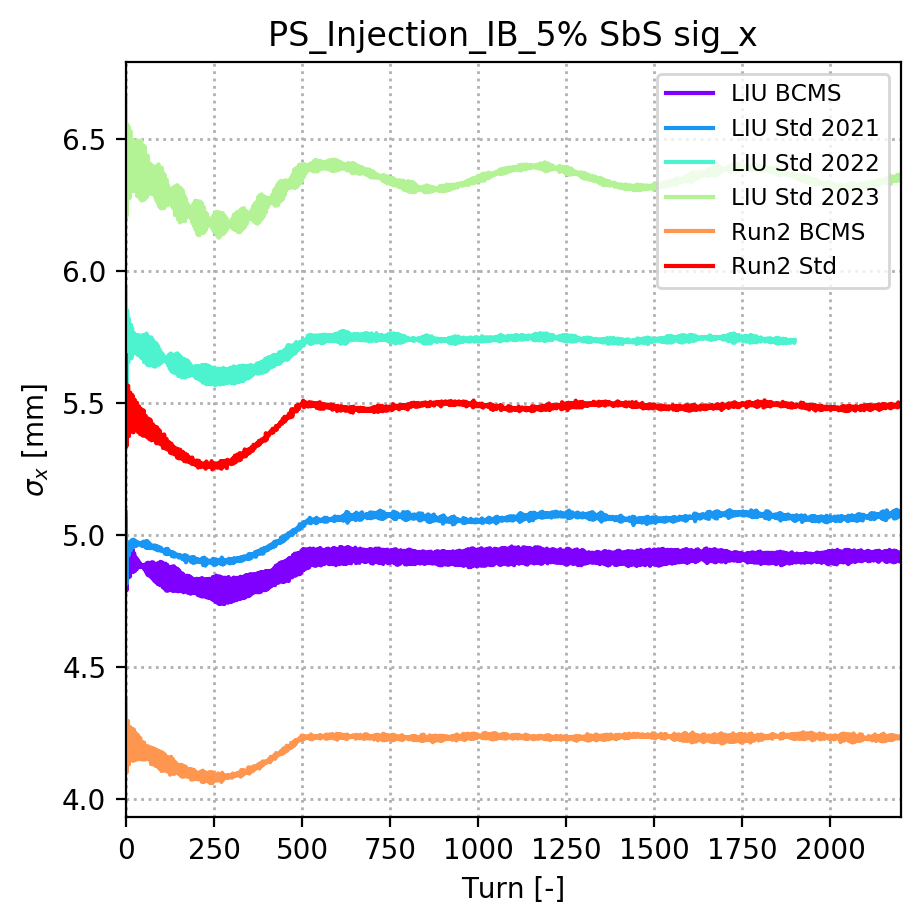

In [10]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

In [11]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

In [12]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p_0}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E3, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

LIU BCMS Average  bunchlength  =  120.2  range =  0.4007  =  0.3333 %
LIU Std 2021 Average  bunchlength  =  119.7  range =  1.342  =  1.121 %
LIU Std 2022 Average  bunchlength  =  151.7  range =  0.5811  =  0.3831 %
LIU Std 2023 Average  bunchlength  =  186.7  range =  4.612  =  2.471 %
Run2 BCMS Average  bunchlength  =  134.2  range =  0.7058  =  0.5261 %
Run2 Std Average  bunchlength  =  162.3  range =  2.4  =  1.479 %


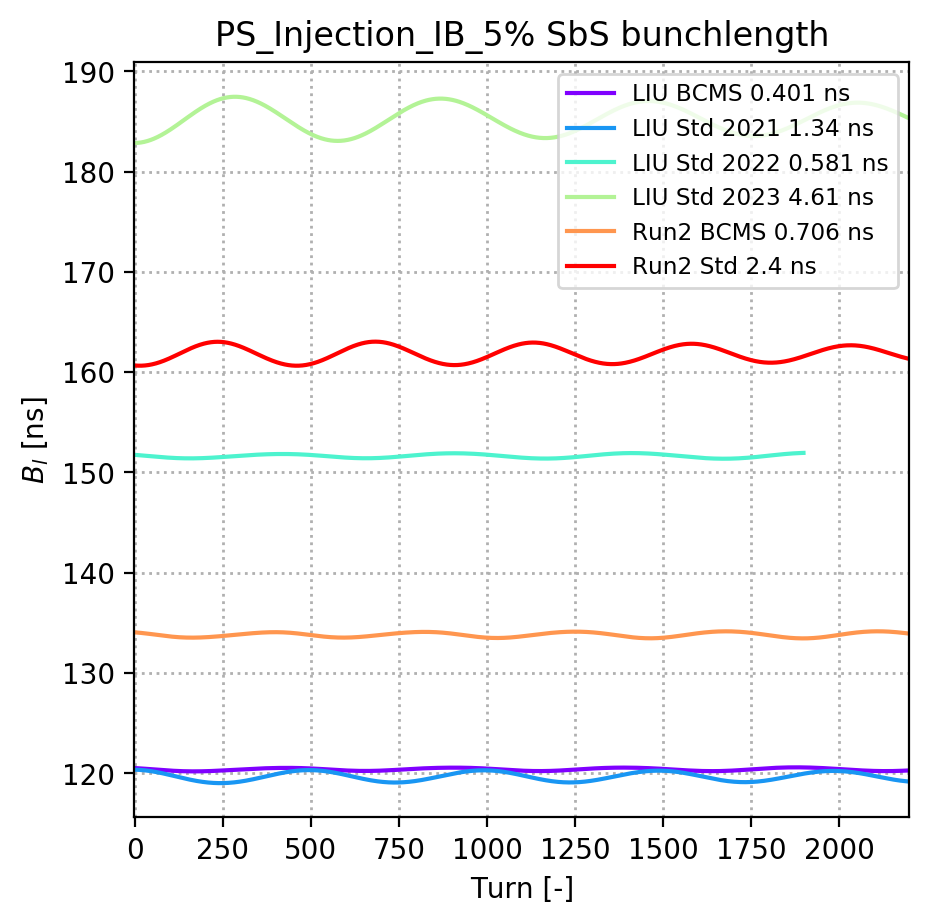

In [13]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):  
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'    
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'           
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

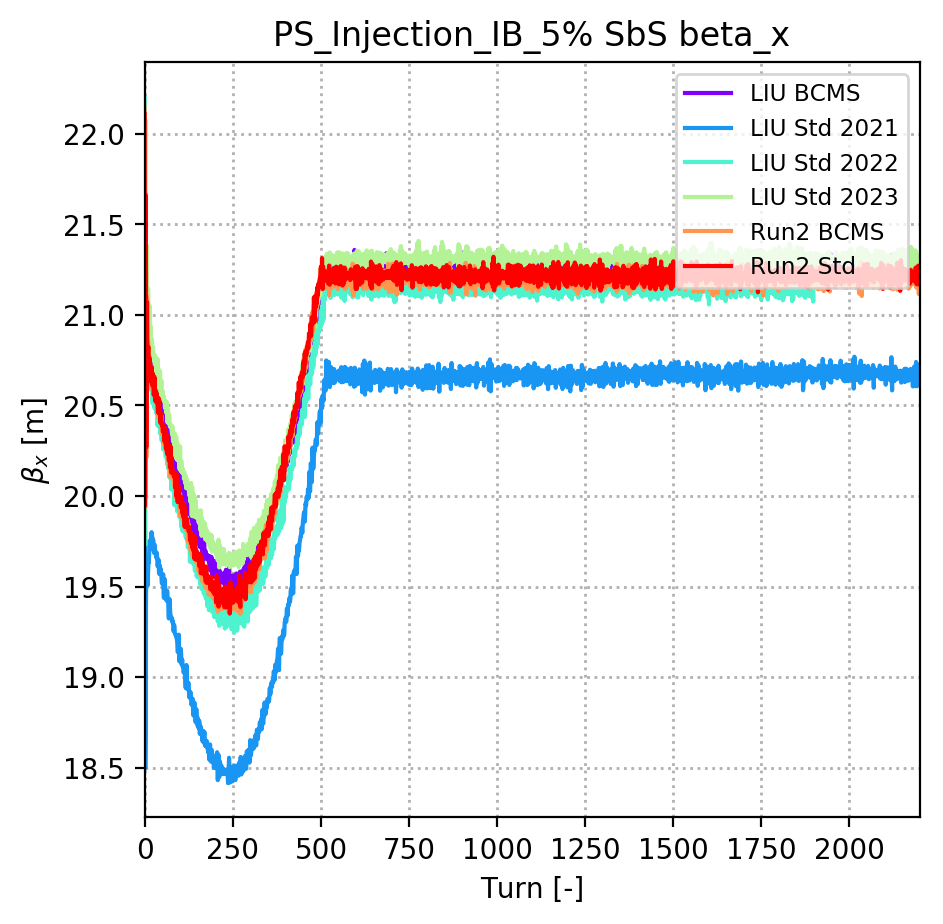

In [14]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

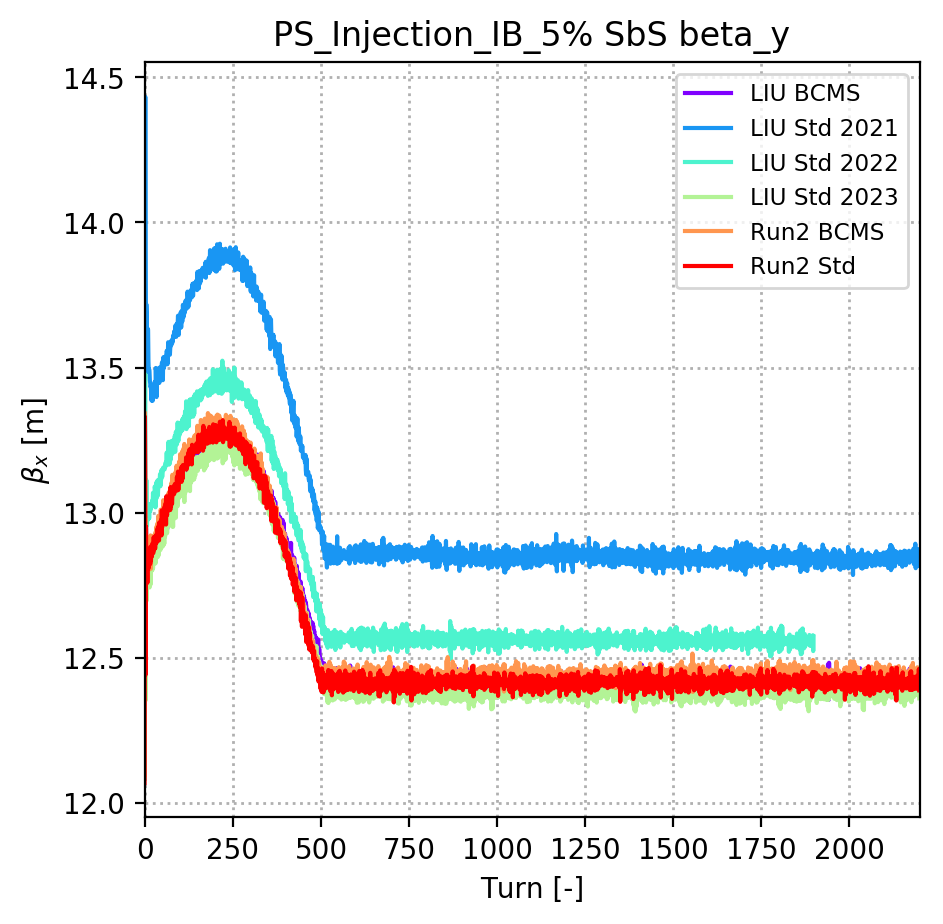

In [15]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

In [16]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{x_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'    
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

LIU BCMS Average  epsn_x  =  1439.0  range =  12.61  =  0.8765 %
LIU Std 2021 Average  epsn_x  =  1952.0  range =  194.6  =  9.971 %
LIU Std 2022 Average  epsn_x  =  1799.0  range =  13.2  =  0.7337 %
LIU Std 2023 Average  epsn_x  =  1813.0  range =  13.24  =  0.7303 %
Run2 BCMS Average  epsn_x  =  1205.0  range =  9.952  =  0.8259 %
Run2 Std Average  epsn_x  =  2263.0  range =  19.65  =  0.8682 %


In [17]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{y_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'    
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

LIU BCMS Average  epsn_y  =  1438.0  range =  7.264  =  0.505 %
LIU Std 2021 Average  epsn_y  =  2085.0  range =  291.4  =  13.97 %
LIU Std 2022 Average  epsn_y  =  1841.0  range =  43.2  =  2.346 %
LIU Std 2023 Average  epsn_y  =  1807.0  range =  9.398  =  0.52 %
Run2 BCMS Average  epsn_y  =  1205.0  range =  6.086  =  0.5052 %
Run2 Std Average  epsn_y  =  2253.0  range =  10.11  =  0.4487 %


LIU BCMS Average  epsn_y  =  1.438  range =  0.006983  =  0.4855 %
LIU Std 2021 Average  epsn_y  =  2.018  range =  0.2208  =  10.94 %
LIU Std 2022 Average  epsn_y  =  1.82  range =  0.02202  =  1.21 %
LIU Std 2023 Average  epsn_y  =  1.81  range =  0.00899  =  0.4966 %
Run2 BCMS Average  epsn_y  =  1.205  range =  0.005628  =  0.4671 %
Run2 Std Average  epsn_y  =  2.258  range =  0.008883  =  0.3934 %


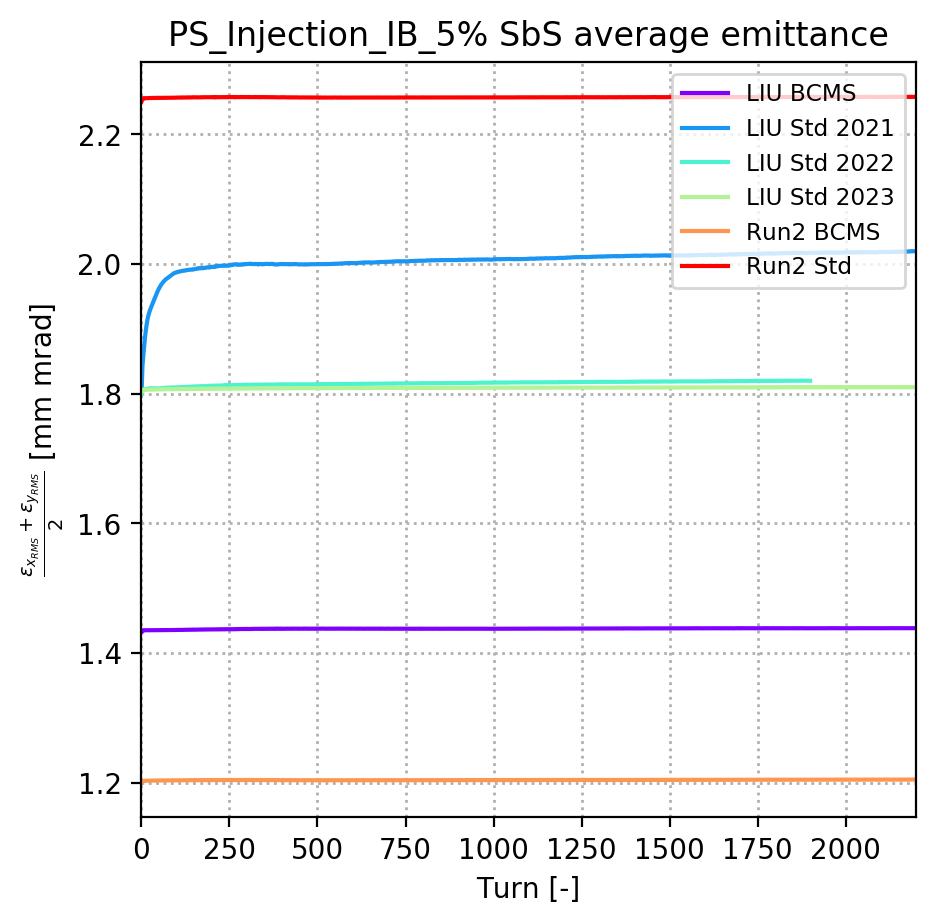

In [18]:
parameter1 = 'epsn_x'
multi1 = 1E6
parameter2 = 'epsn_y'
multi2 = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' average emittance'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{ \epsilon_{x_{RMS}} + \epsilon_{y_{RMS}} }{2}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        x = np.array(dd3[key]['turn'][0])
        y = np.array((dd3[key][parameter1][0]*multi1 + dd3[key][parameter2][0]*multi2)/2)
        ax1.plot(x, y, label=key, color=colors[c_it]);
        av_ = np.mean(y[-100])
        rang_ = np.abs(np.max(y) - np.min(y))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'    
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_average_emittance.png'
plt.savefig(savename, dpi = 800);

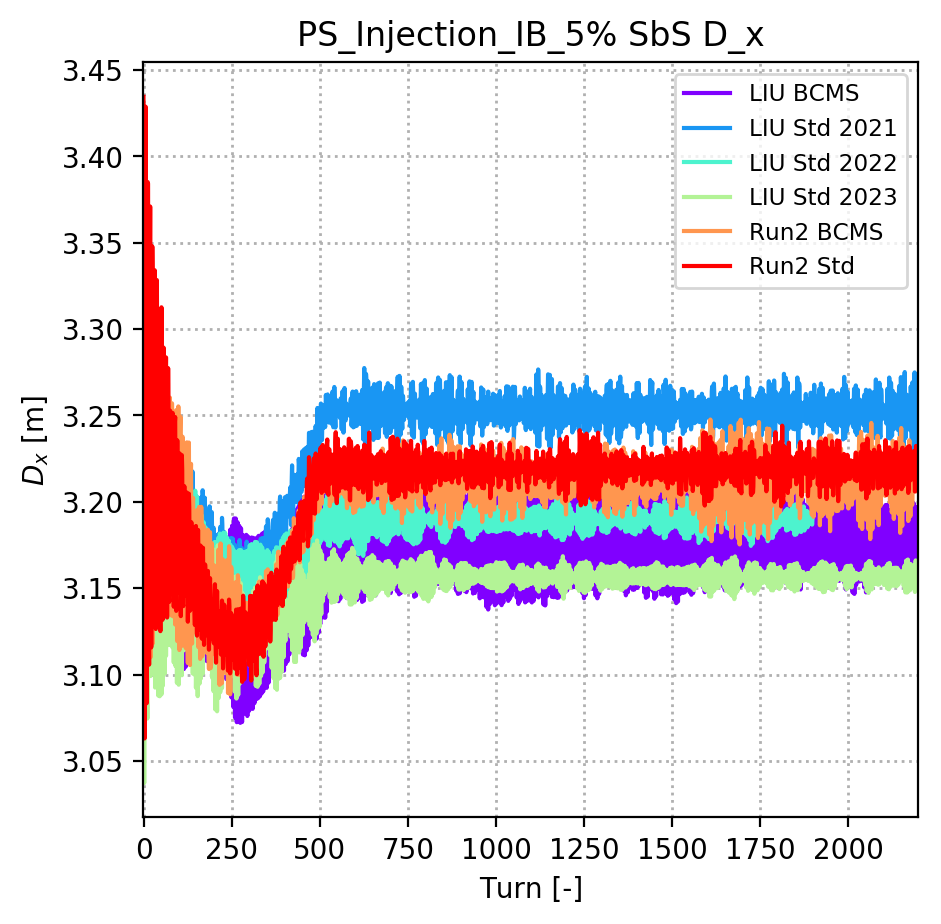

In [19]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

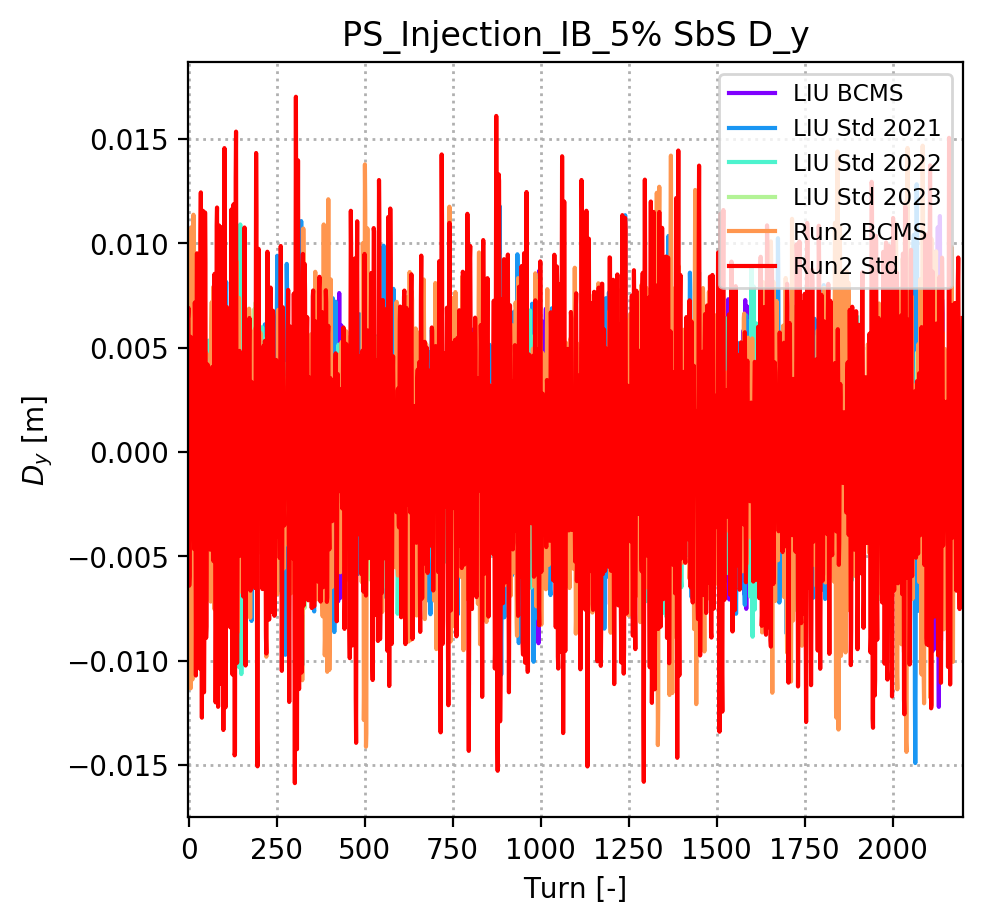

In [20]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{y}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Compare individual cases

## Run2 Standard

In [21]:
# Create dd dictionary
dd = dict()

run_lab = 'Run2_Std'

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', 'Run2 Std')
dd = add_input_file(dd, '../19_SC_Mini/Run2_Standard/output/output.mat', 'Run2 Std Old')

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  Run2 Std
	Added output data from  ../19_SC_Mini/Run2_Standard/output/output.mat 	 dictionary key:  Run2 Std Old


Run2 Std Average  bunchlength  =  162.3  range =  2.4  =  1.479 %
Run2 Std Old Average  bunchlength  =  162.8  range =  14.59  =  8.956 %


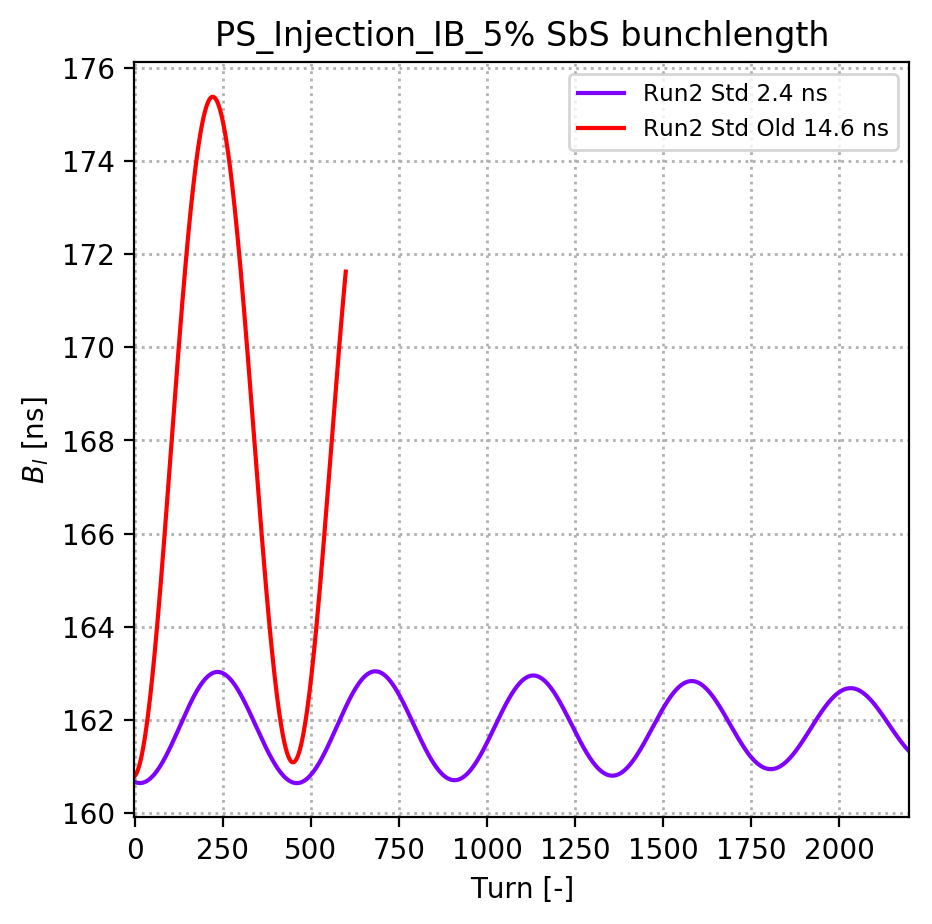

In [22]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

## Run 2 BCMS

In [23]:
# Create dd dictionary
dd = dict()
run_lab = 'Run2_BCMS'
dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', 'Run2 BCMS')
dd = add_input_file(dd, '../19_SC_Mini/Run2_BCMS/output/output.mat', 'Run2 BCMS Old')

	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  Run2 BCMS
	Added output data from  ../19_SC_Mini/Run2_BCMS/output/output.mat 	 dictionary key:  Run2 BCMS Old


In [24]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

Run2 BCMS Average  bunchlength  =  134.2  range =  0.7058  =  0.5261 %
Run2 BCMS Old Average  bunchlength  =  134.9  range =  11.97  =  8.877 %


## Run 3 BCMS

In [25]:
# Create dd dictionary
dd = dict()
run_lab = 'Run3_BCMS'
dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', 'Run3 BCMS')
dd = add_input_file(dd, '../19_SC_Mini/Run3_BCMS/output/output.mat', 'Run3 BCMS Old')

	Added output data from  Run3_BCMS/output/output.mat 	 dictionary key:  Run3 BCMS
	Added output data from  ../19_SC_Mini/Run3_BCMS/output/output.mat 	 dictionary key:  Run3 BCMS Old


Run3 BCMS Average  bunchlength  =  120.2  range =  0.4007  =  0.3333 %
Run3 BCMS Old Average  bunchlength  =  128.3  range =  8.019  =  6.249 %


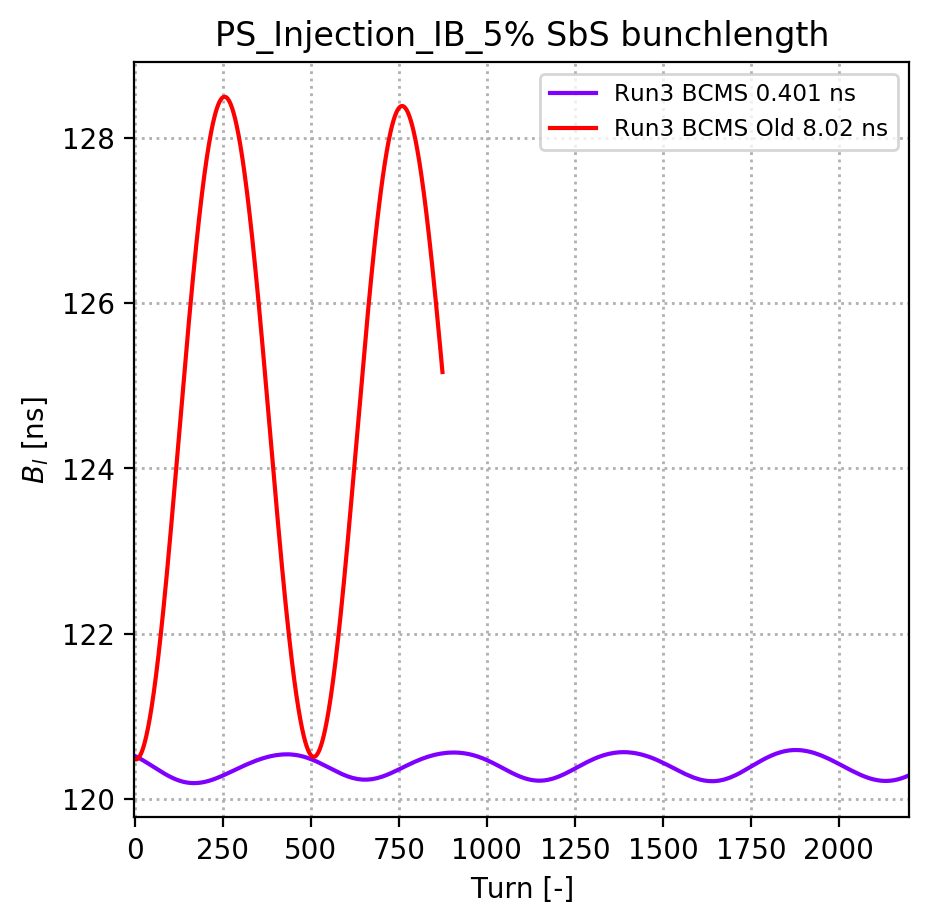

In [26]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Run 3 Std 2021

In [27]:
# Create dd dictionary
dd = dict()
run_lab = 'Run3_Std_2021'
dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', 'Run3 Std 2021')
dd = add_input_file(dd, '../19_SC_Mini/Run3_Standard_2021/output/output.mat', 'Run3 Std 2021 Old')

	Added output data from  Run3_Standard_2021/output/output.mat 	 dictionary key:  Run3 Std 2021
	Added output data from  ../19_SC_Mini/Run3_Standard_2021/output/output.mat 	 dictionary key:  Run3 Std 2021 Old


Run3 Std 2021 Average  bunchlength  =  119.7  range =  1.342  =  1.121 %
Run3 Std 2021 Old Average  bunchlength  =  134.0  range =  15.11  =  11.28 %


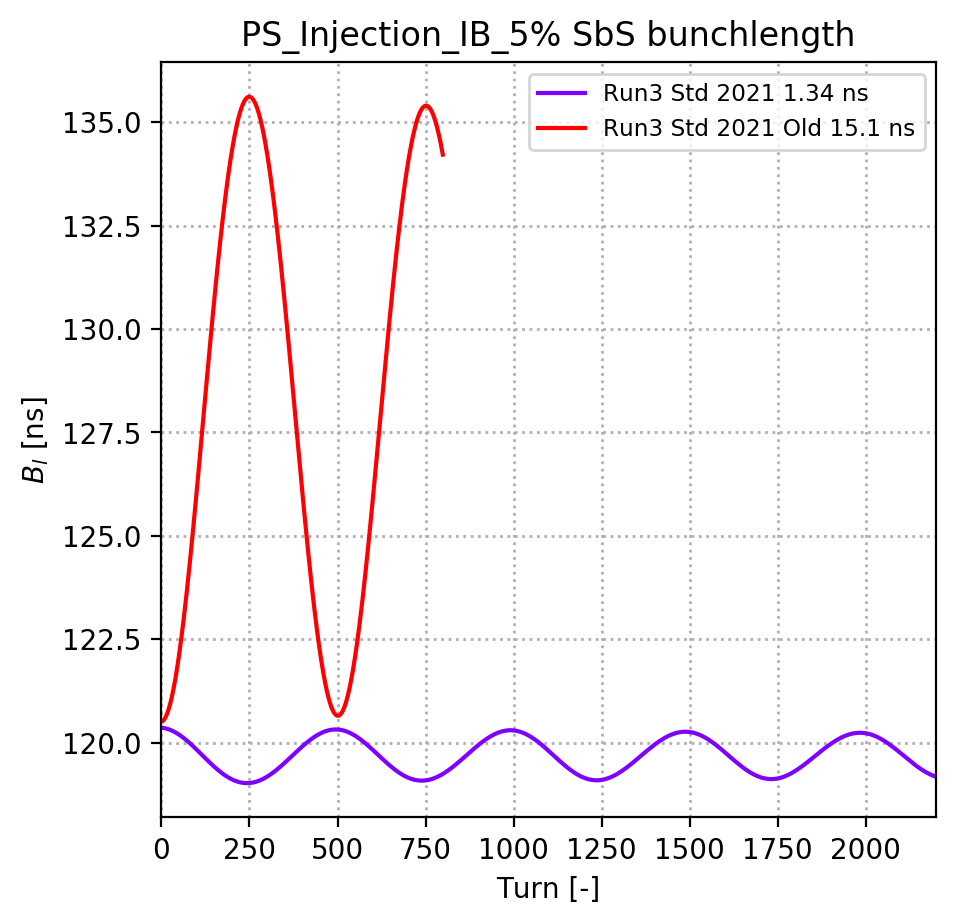

In [28]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Run 3 Std 2022

In [29]:
# Create dd dictionary
dd = dict()
run_lab = 'Run3_Std_2022'
dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', 'Run3 Std 2022')
dd = add_input_file(dd, '../19_SC_Mini/Run3_Standard_2022/output/output.mat', 'Run3 Std 2022 Old')

	Added output data from  Run3_Standard_2022/output/output.mat 	 dictionary key:  Run3 Std 2022
	Added output data from  ../19_SC_Mini/Run3_Standard_2022/output/output.mat 	 dictionary key:  Run3 Std 2022 Old


Run3 Std 2022 Average  bunchlength  =  151.7  range =  0.5811  =  0.3831 %
Run3 Std 2022 Old Average  bunchlength  =  159.8  range =  11.16  =  6.986 %


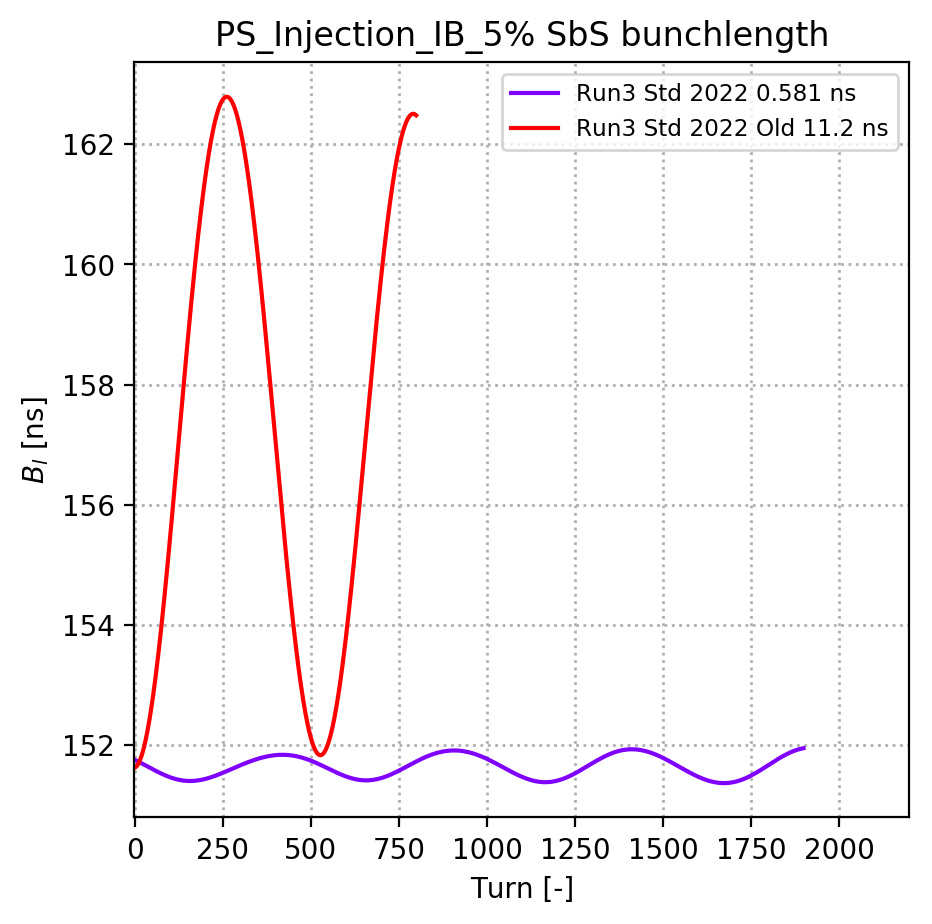

In [30]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Run 3 Std 2023

In [31]:
# Create dd dictionary
dd = dict()
run_lab = 'Run3_Std_2023'
dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', 'Run3 Std 2023')
dd = add_input_file(dd, '../19_SC_Mini/Run3_Standard_2023/output/output.mat', 'Run3 Std 2023 Old')

	Added output data from  Run3_Standard_2023/output/output.mat 	 dictionary key:  Run3 Std 2023
	Added output data from  ../19_SC_Mini/Run3_Standard_2023/output/output.mat 	 dictionary key:  Run3 Std 2023 Old


Run3 Std 2023 Average  bunchlength  =  186.7  range =  4.612  =  2.471 %
Run3 Std 2023 Old Average  bunchlength  =  188.0  range =  5.808  =  3.089 %


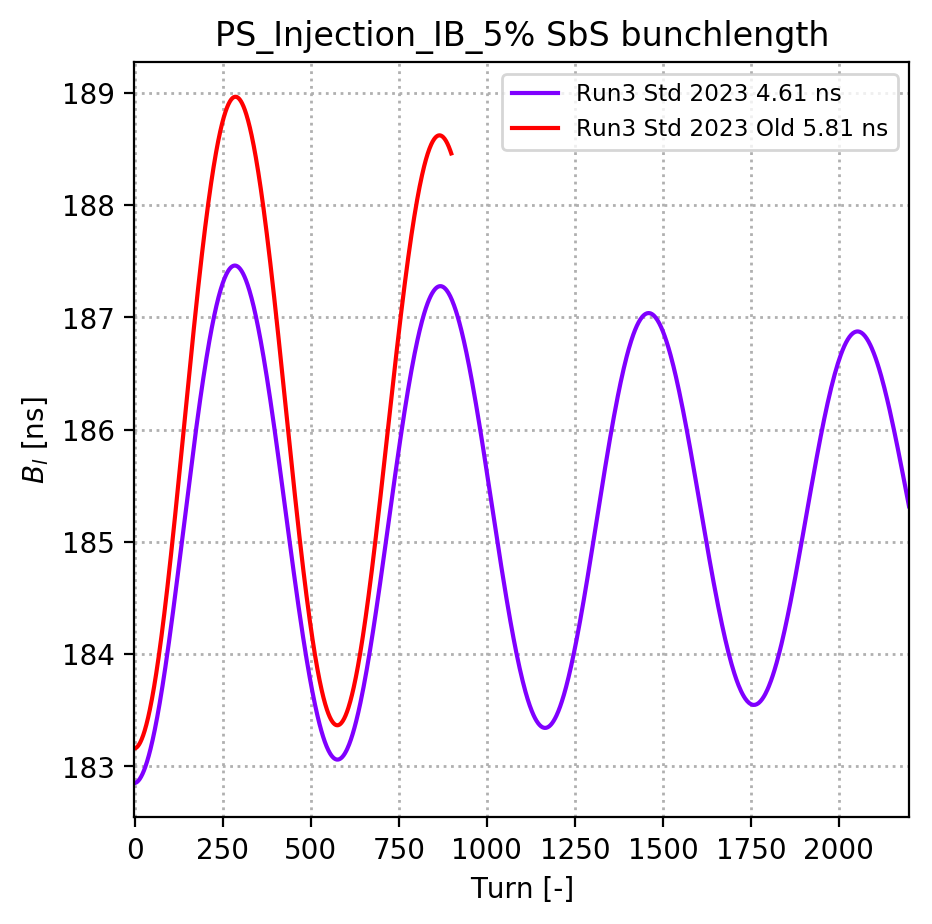

In [32]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Plots for IPP talk

In [33]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 5

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  00 Run2 Standard
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
00 Run2 Standard Average  epsn_y  =  2.253  range =  0.01011  =  0.4487 %
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %


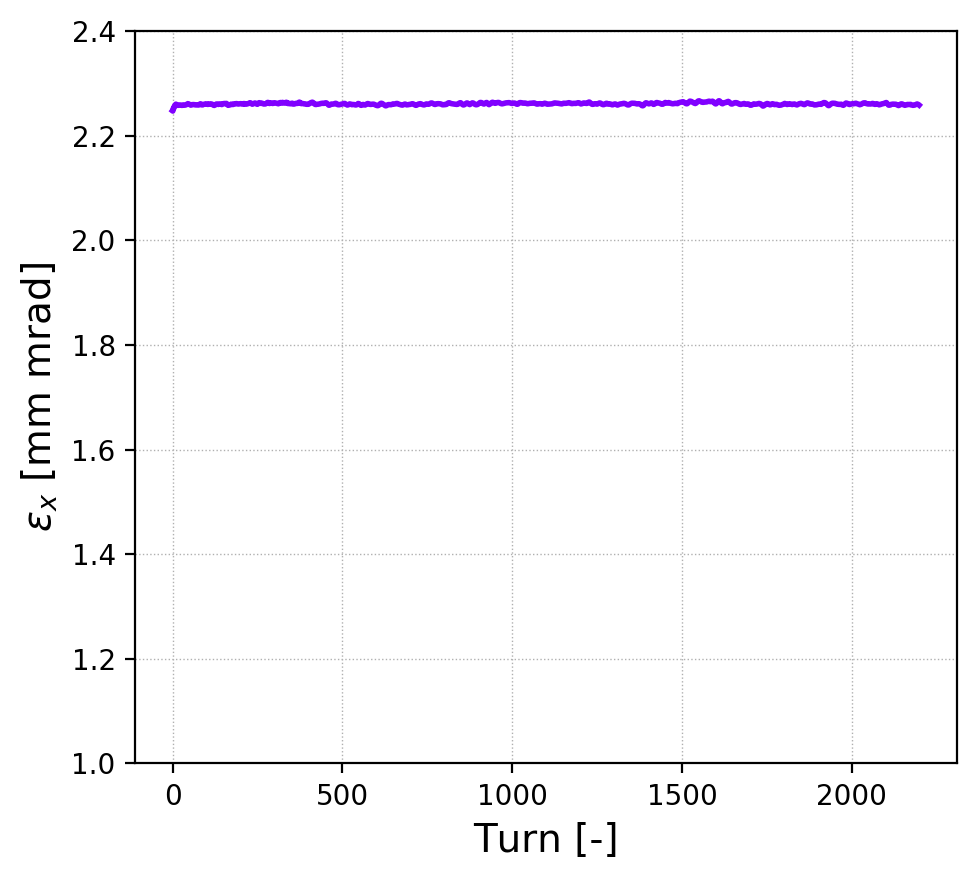

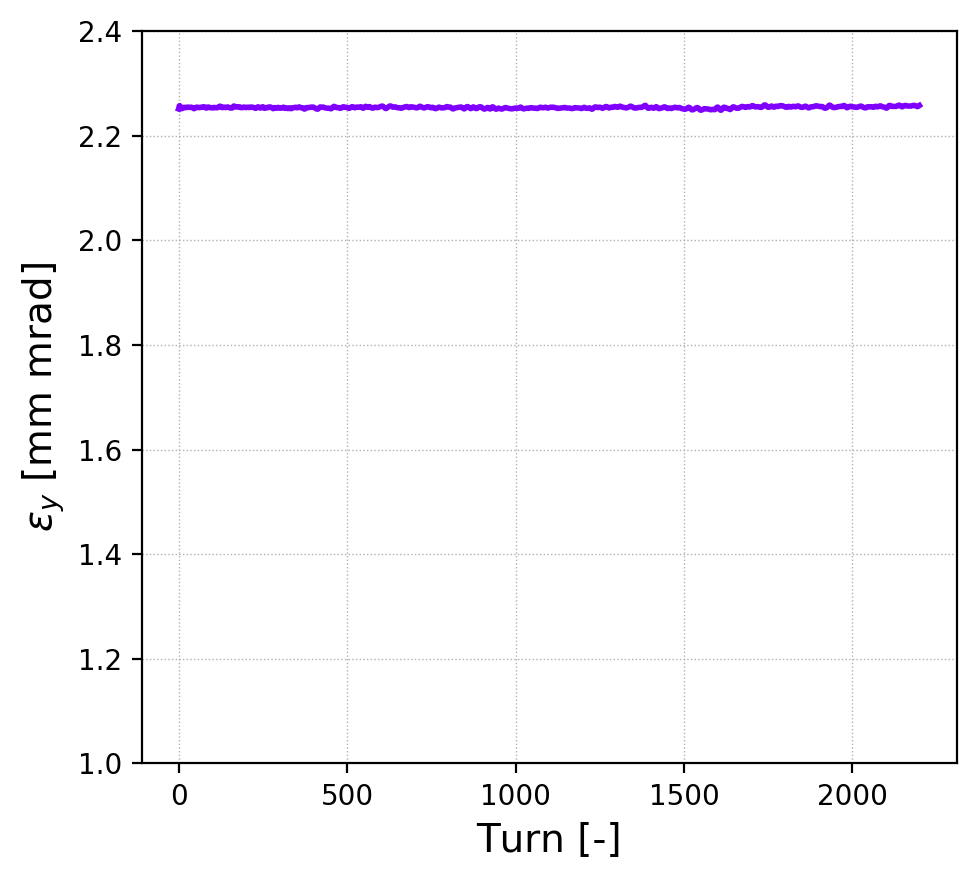

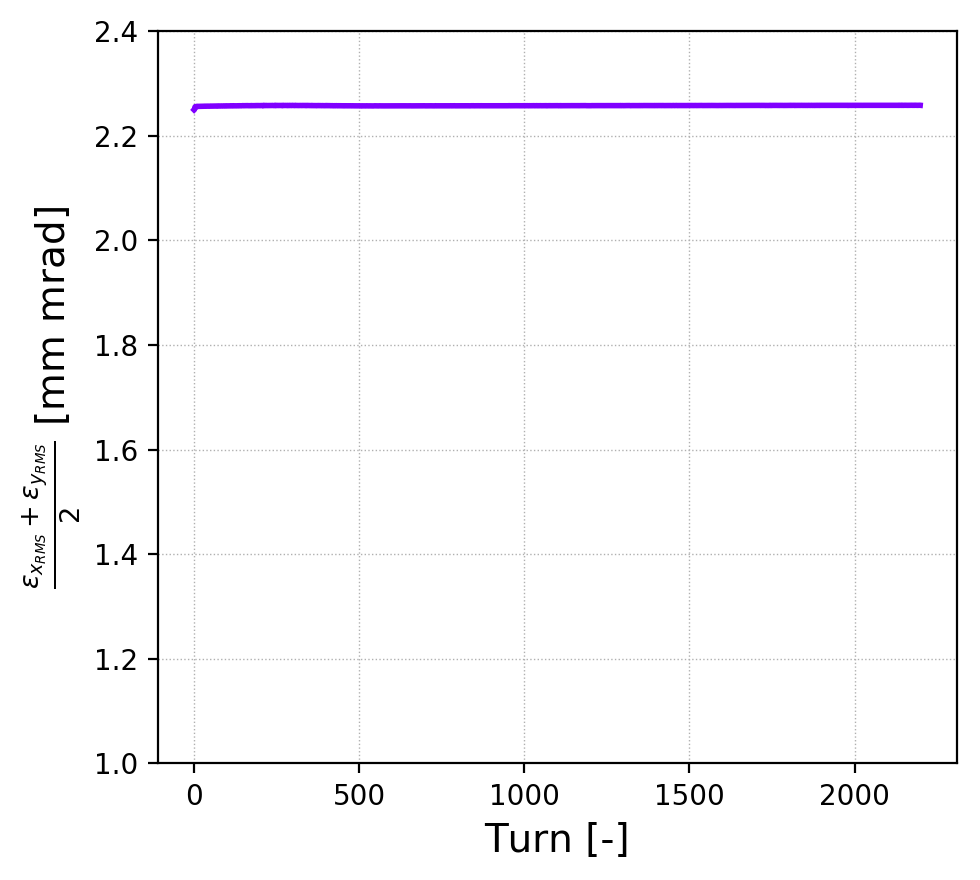

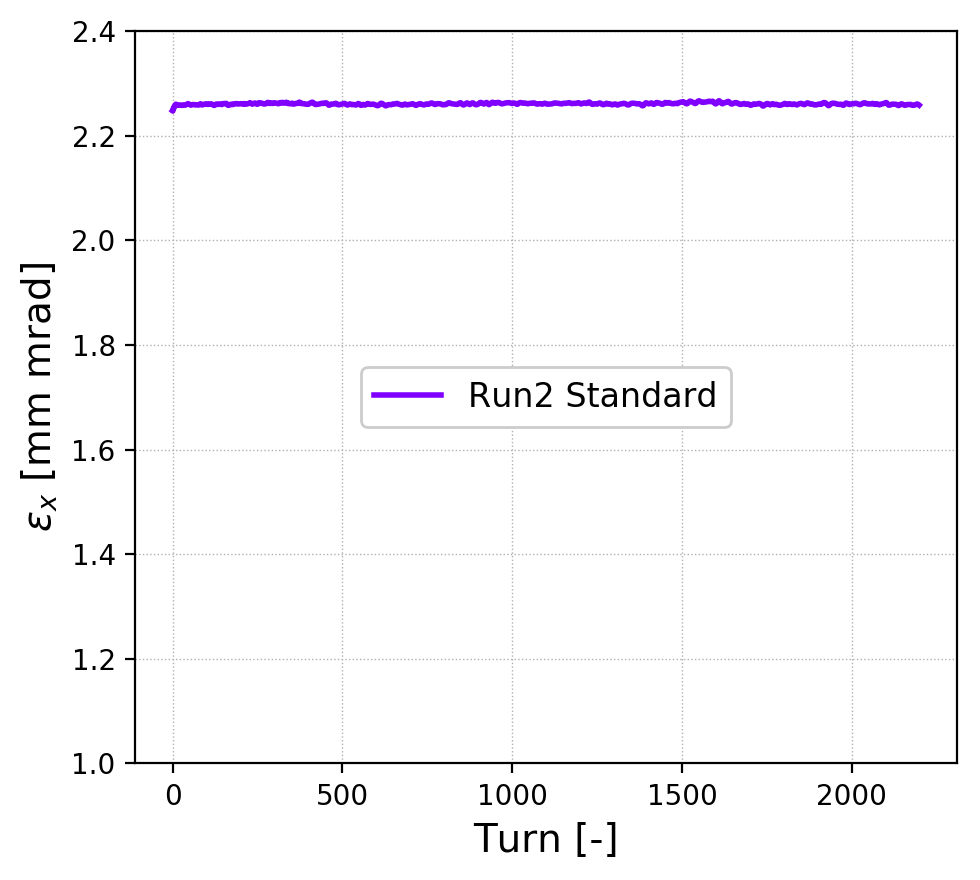

In [34]:
dd = dict()

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', '00 Run2 Standard')
#dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', '01 Run2 BCMS')

#dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', '02 LIU BCMS')

#dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', '03 LIU Standard 2021')
#dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', '04 LIU Standard 2022')
#dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', '05 LIU Standard 2023')

parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
#ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)








parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)









parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_average_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\frac{ \epsilon_{x_{RMS}} + \epsilon_{y_{RMS}} }{2}$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], ((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)






parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'_legend.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  00 Run2 Standard
	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  01 Run2 BCMS
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %
00 Run2 Standard Average  epsn_y  =  2.253  range =  0.01011  =  0.4487 %
01 Run2 BCMS Average  epsn_y  =  1.205  range =  0.006086  =  0.5052 %
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %


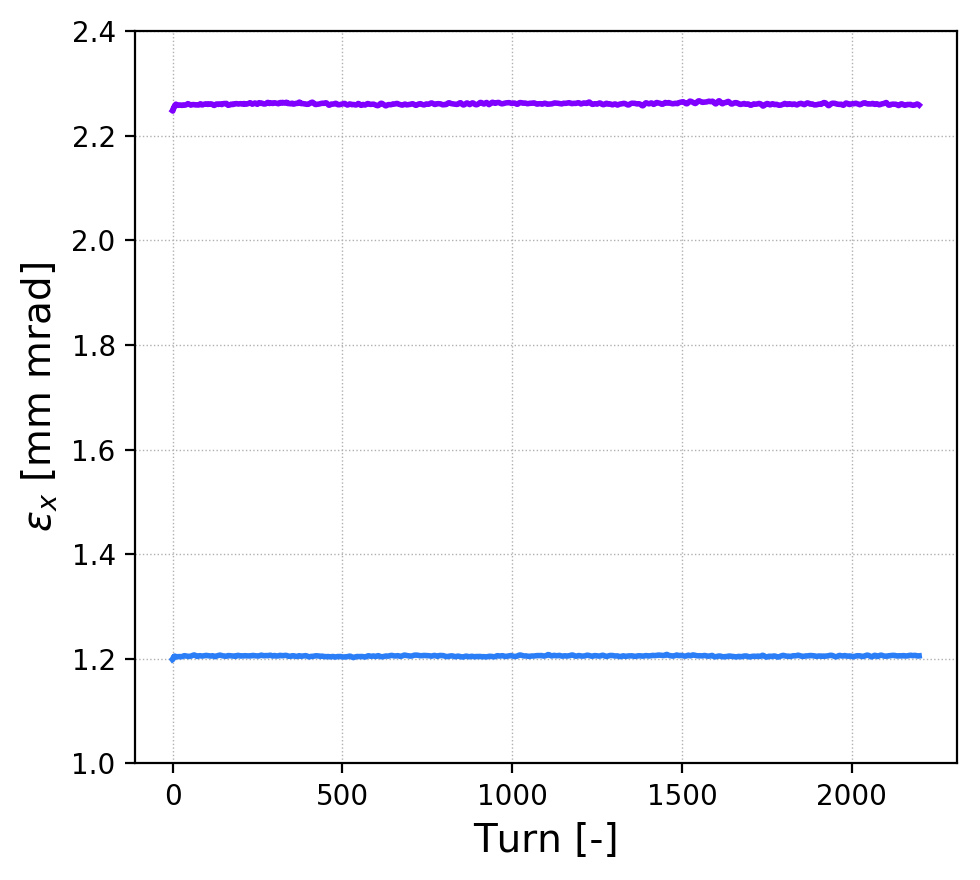

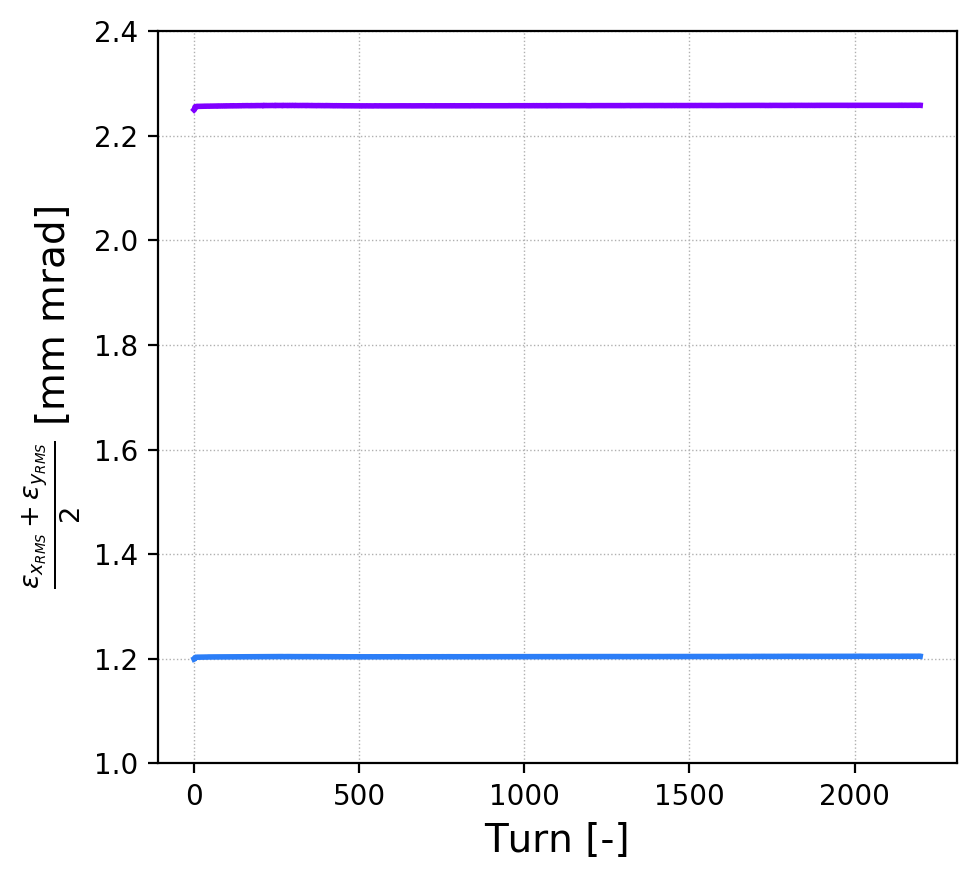

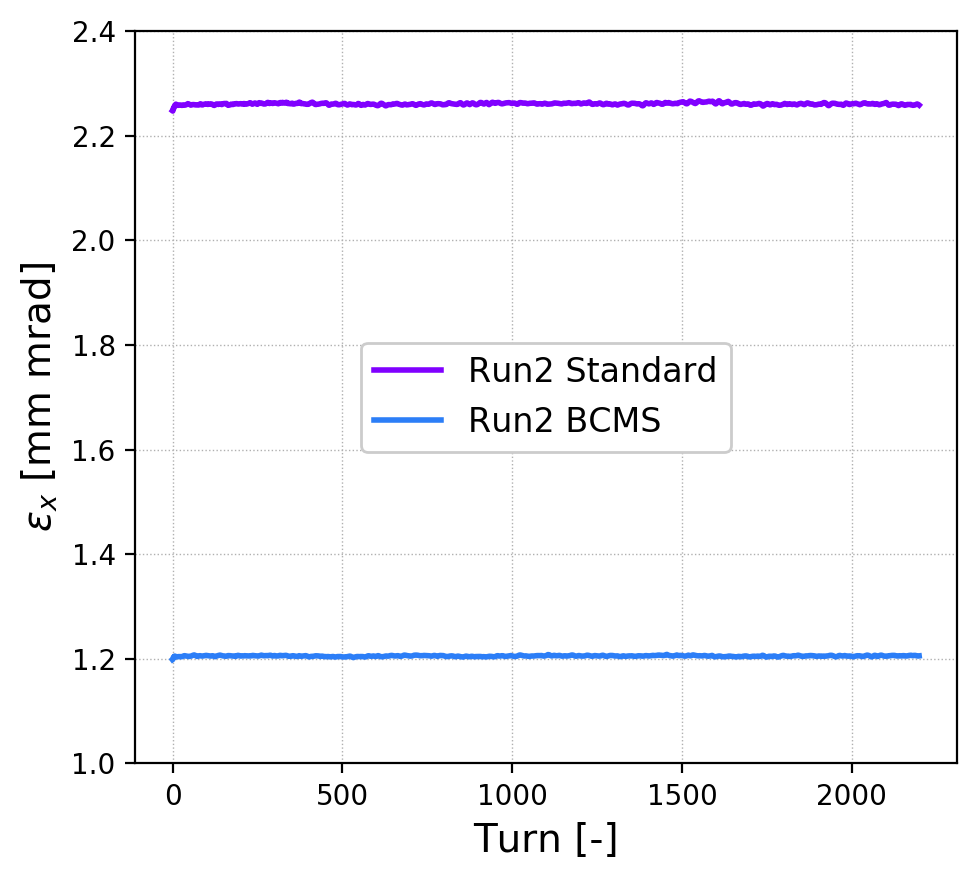

In [35]:
dd = dict()

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', '00 Run2 Standard')
dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', '01 Run2 BCMS')

#dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', '02 LIU BCMS')

#dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', '03 LIU Standard 2021')
#dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', '04 LIU Standard 2022')
#dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', '05 LIU Standard 2023')

parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
#ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)








parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)









parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_average_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\frac{ \epsilon_{x_{RMS}} + \epsilon_{y_{RMS}} }{2}$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], ((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)






parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'_legend.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  00 Run2 Standard
	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  01 Run2 BCMS
	Added output data from  Run3_Standard_2023/output/output.mat 	 dictionary key:  02 LIU Standard
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %
02 LIU Standard Average  epsn_x  =  1.813  range =  0.01324  =  0.7303 %
00 Run2 Standard Average  epsn_y  =  2.253  range =  0.01011  =  0.4487 %
01 Run2 BCMS Average  epsn_y  =  1.205  range =  0.006086  =  0.5052 %
02 LIU Standard Average  epsn_y  =  1.807  range =  0.009398  =  0.52 %
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %
02 LIU Standard Average  epsn_x  =  1.813  range =  0.01324  =  0.7303 %
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 

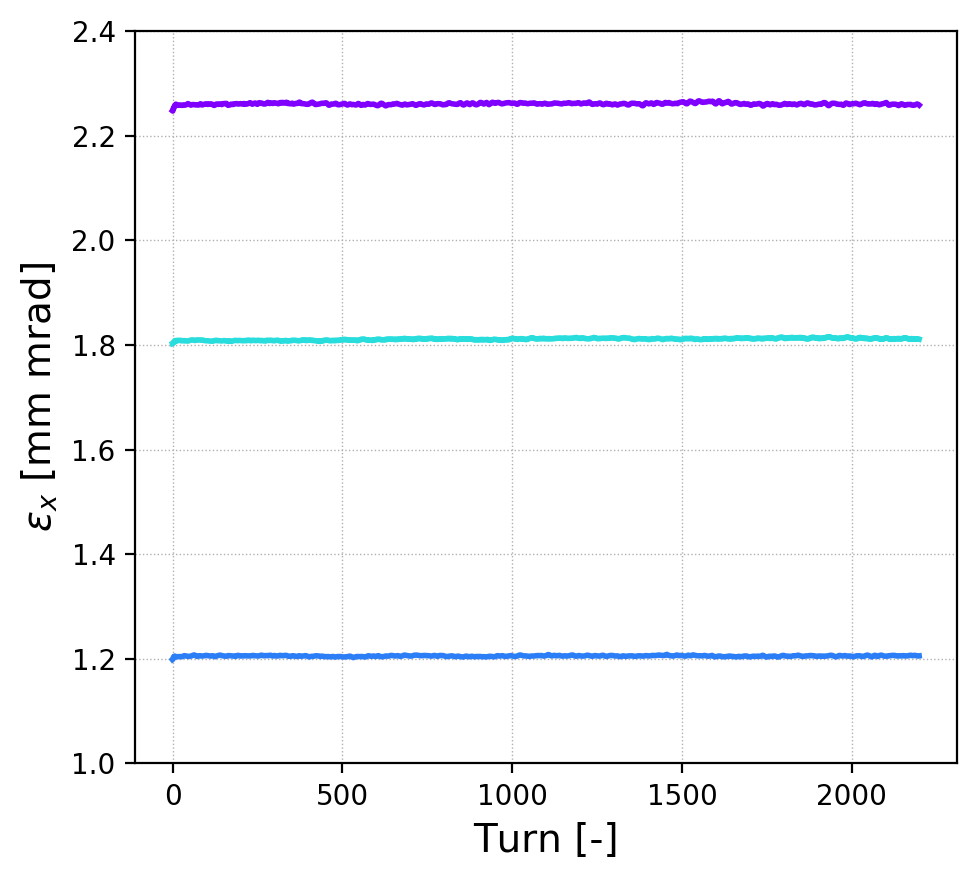

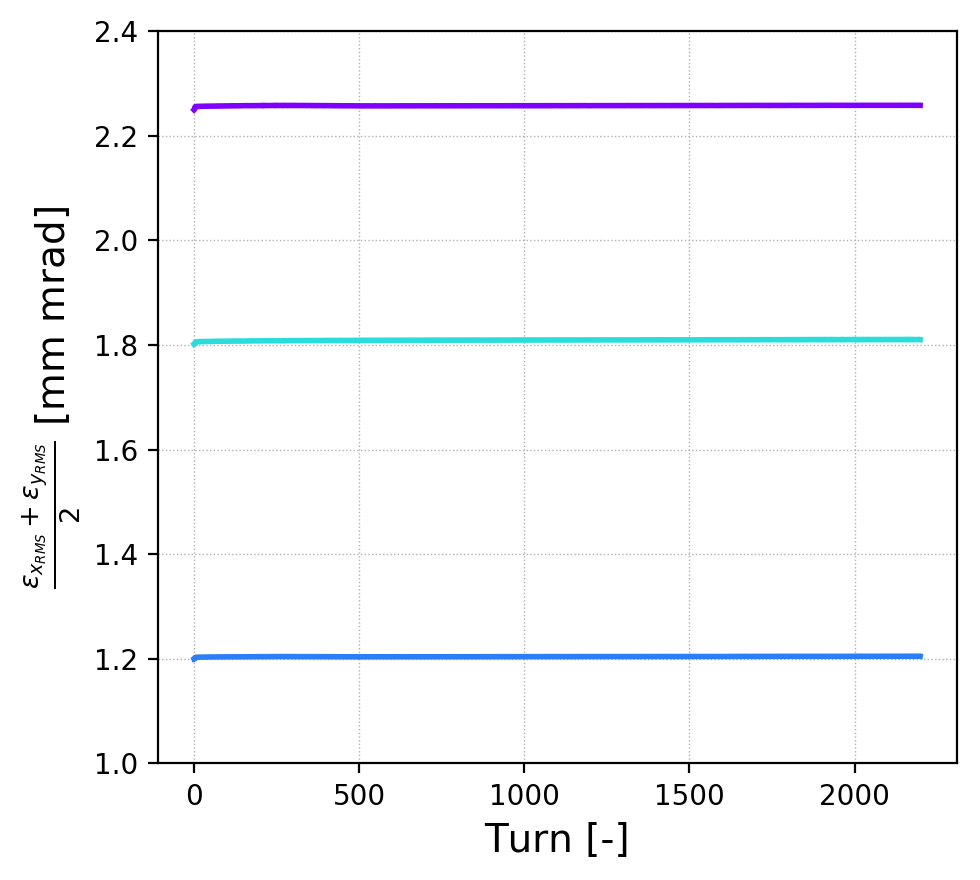

In [36]:
dd = dict()

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', '00 Run2 Standard')
dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', '01 Run2 BCMS')
dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', '02 LIU Standard')

#dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', '02 LIU BCMS')

#dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', '03 LIU Standard 2021')
#dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', '04 LIU Standard 2022')

parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
#ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)








parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)









parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_average_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\frac{ \epsilon_{x_{RMS}} + \epsilon_{y_{RMS}} }{2}$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], ((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)






parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'_legend.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  00 Run2 Standard
	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  01 Run2 BCMS
	Added output data from  Run3_Standard_2023/output/output.mat 	 dictionary key:  02 LIU Standard
	Added output data from  Run3_BCMS/output/output.mat 	 dictionary key:  03 LIU BCMS
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %
02 LIU Standard Average  epsn_x  =  1.813  range =  0.01324  =  0.7303 %
03 LIU BCMS Average  epsn_x  =  1.439  range =  0.01261  =  0.8765 %
00 Run2 Standard Average  epsn_y  =  2.253  range =  0.01011  =  0.4487 %
01 Run2 BCMS Average  epsn_y  =  1.205  range =  0.006086  =  0.5052 %
02 LIU Standard Average  epsn_y  =  1.807  range =  0.009398  =  0.52 %
03 LIU BCMS Average  epsn_y  =  1.438  range =  0.007264  =  0.505 %
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8

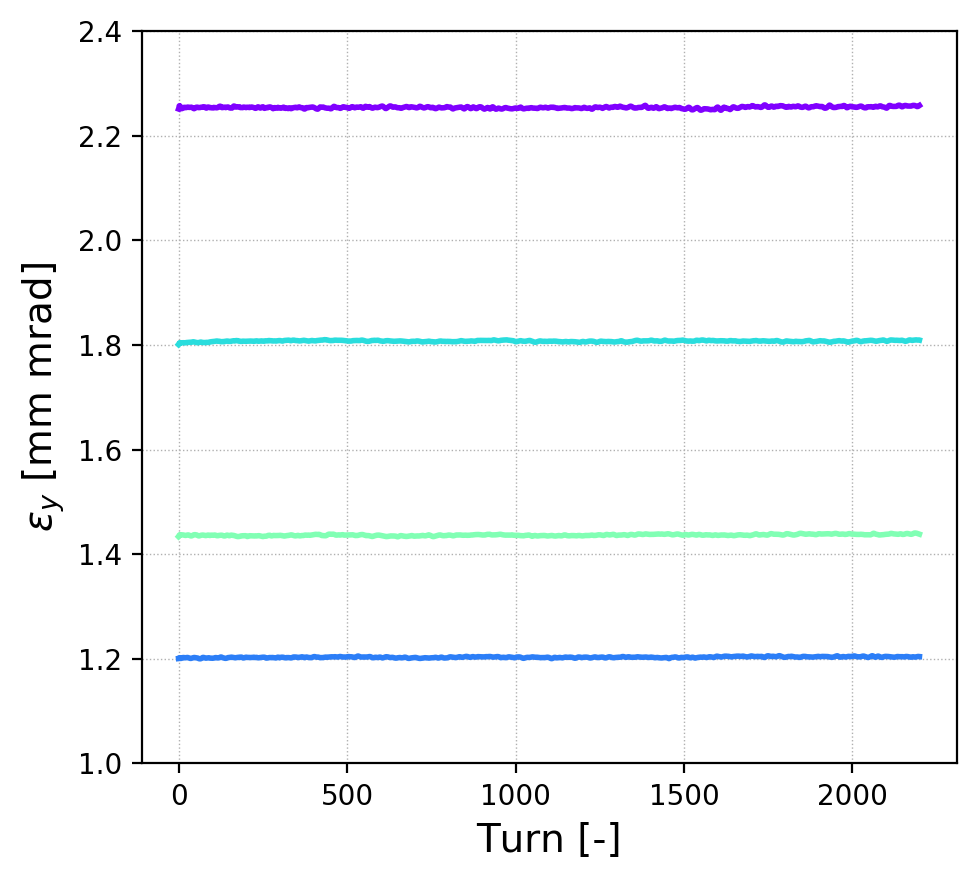

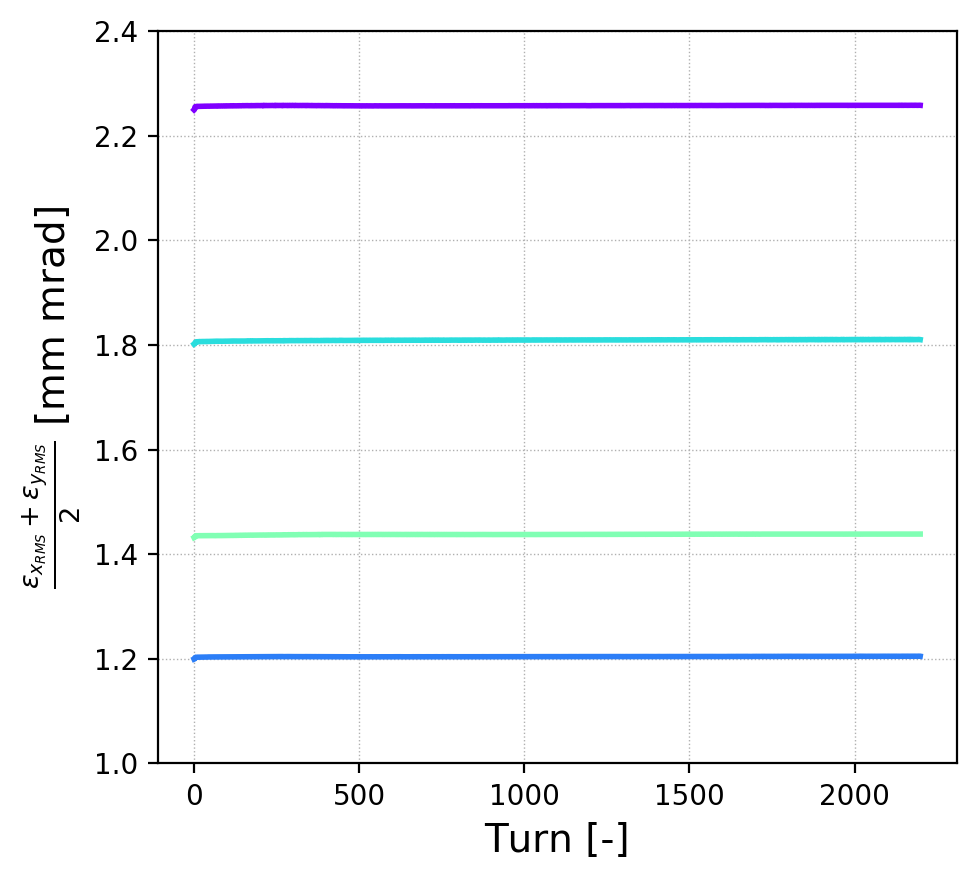

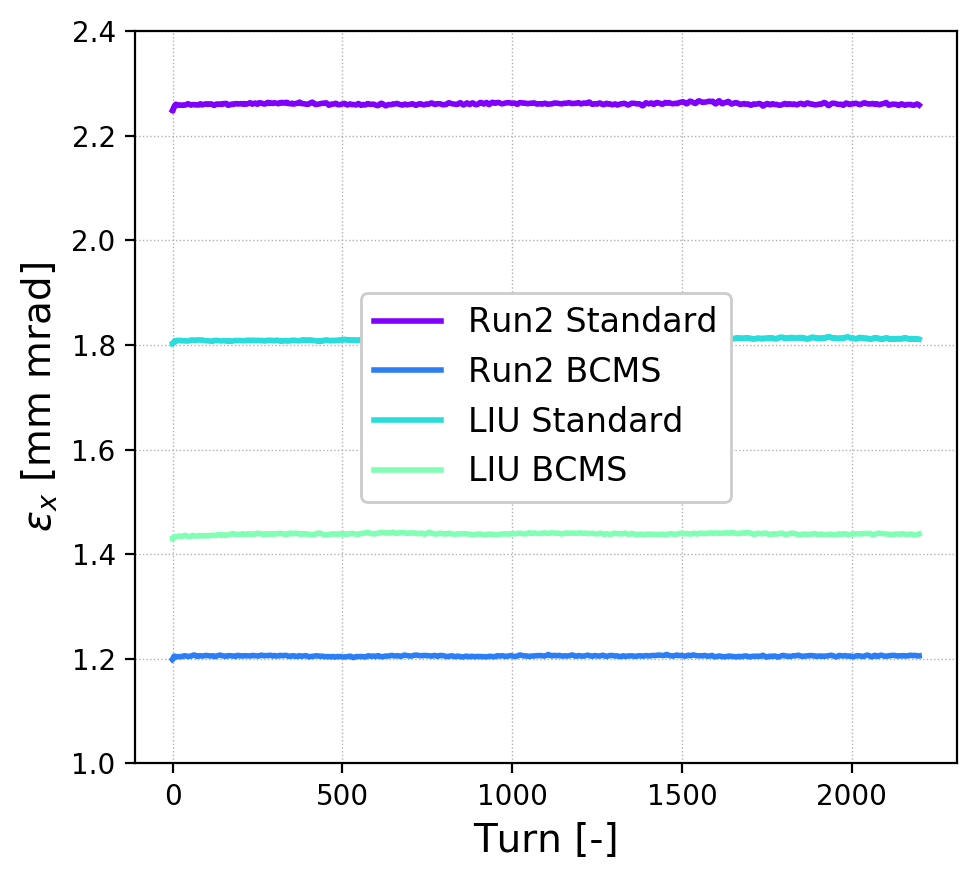

In [37]:
dd = dict()

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', '00 Run2 Standard')
dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', '01 Run2 BCMS')
dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', '02 LIU Standard')
dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', '03 LIU BCMS')

#dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', '03 LIU Standard 2021')
#dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', '04 LIU Standard 2022')

parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
#ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)








parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)









parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_average_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\frac{ \epsilon_{x_{RMS}} + \epsilon_{y_{RMS}} }{2}$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], ((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)






parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_' + str(len(dd))+'_legend.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  00 Run2 Standard
	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  01 Run2 BCMS
	Added output data from  Run3_BCMS/output/output.mat 	 dictionary key:  02 LIU BCMS
	Added output data from  Run3_Standard_2021/output/output.mat 	 dictionary key:  03 LIU Standard 2021
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %
02 LIU BCMS Average  epsn_x  =  1.439  range =  0.01261  =  0.8765 %
03 LIU Standard 2021 Average  epsn_x  =  1.952  range =  0.1946  =  9.971 %
00 Run2 Standard Average  epsn_y  =  2.253  range =  0.01011  =  0.4487 %
01 Run2 BCMS Average  epsn_y  =  1.205  range =  0.006086  =  0.5052 %
02 LIU BCMS Average  epsn_y  =  1.438  range =  0.007264  =  0.505 %
03 LIU Standard 2021 Average  epsn_y  =  2.085  range =  0.2914  =  13.97 %
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.0

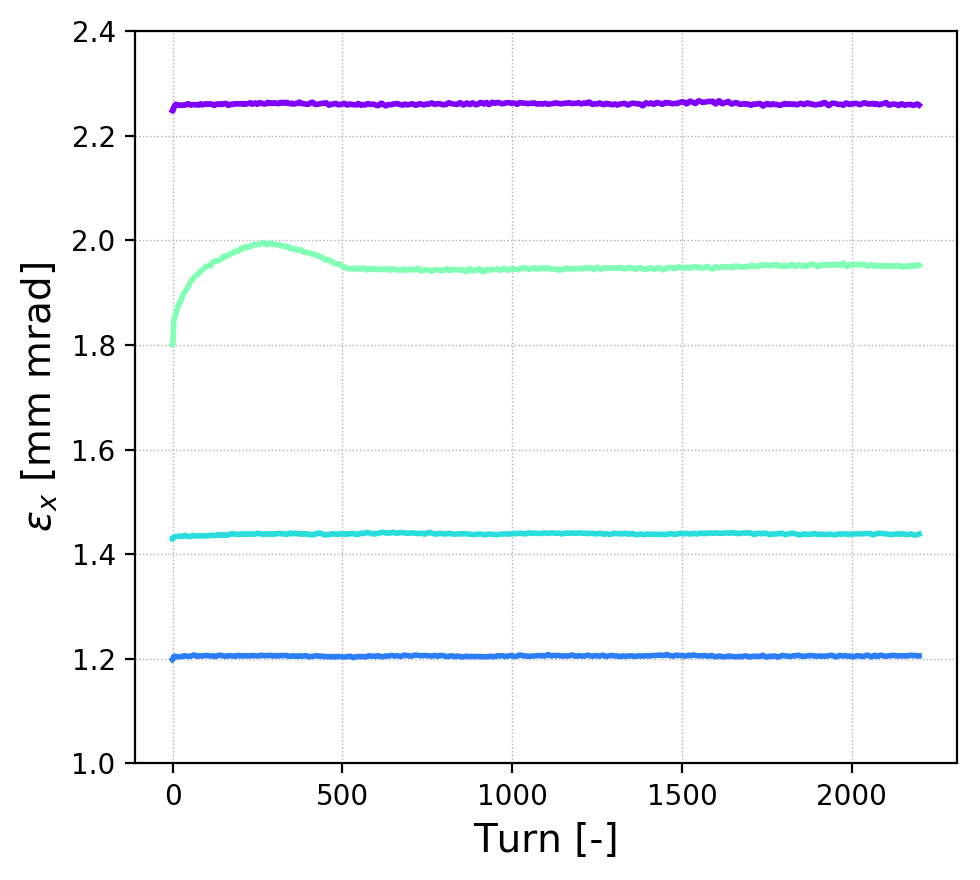

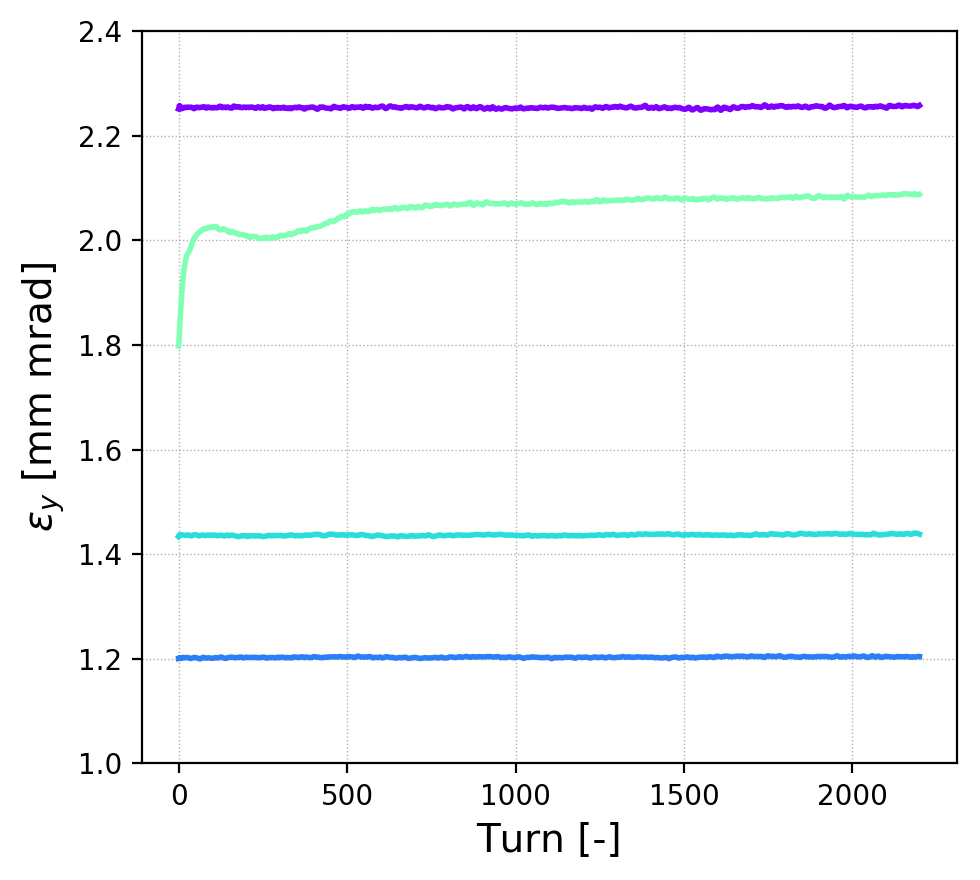

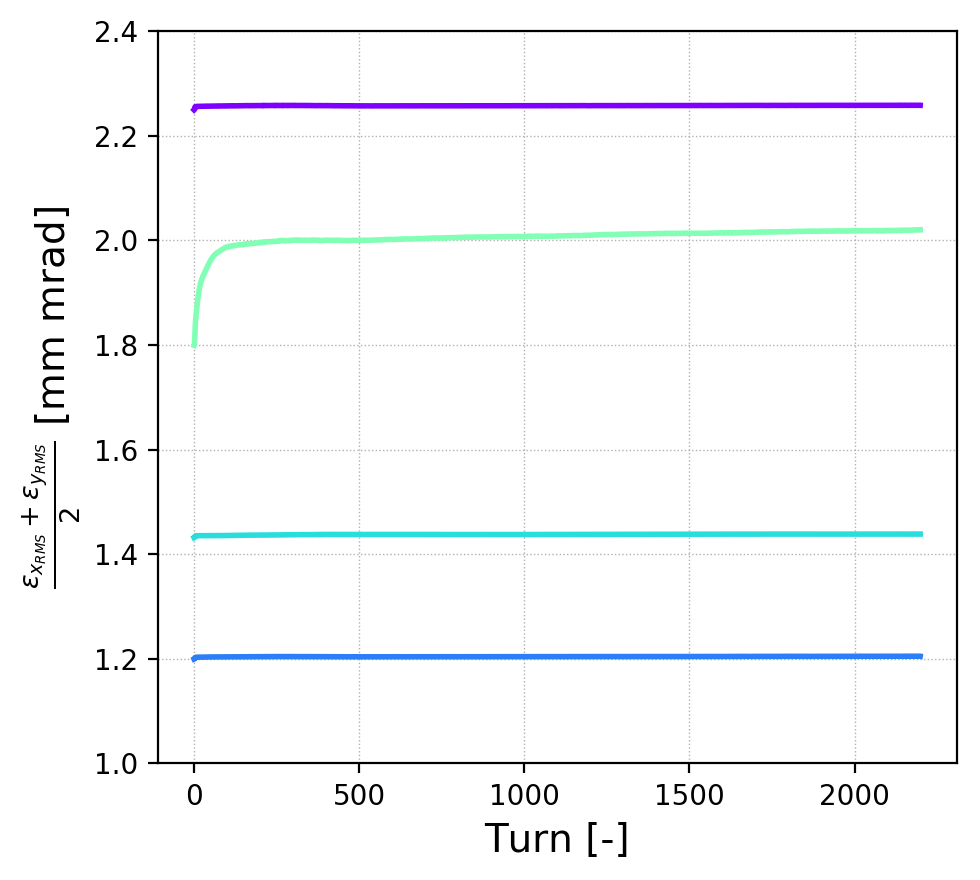

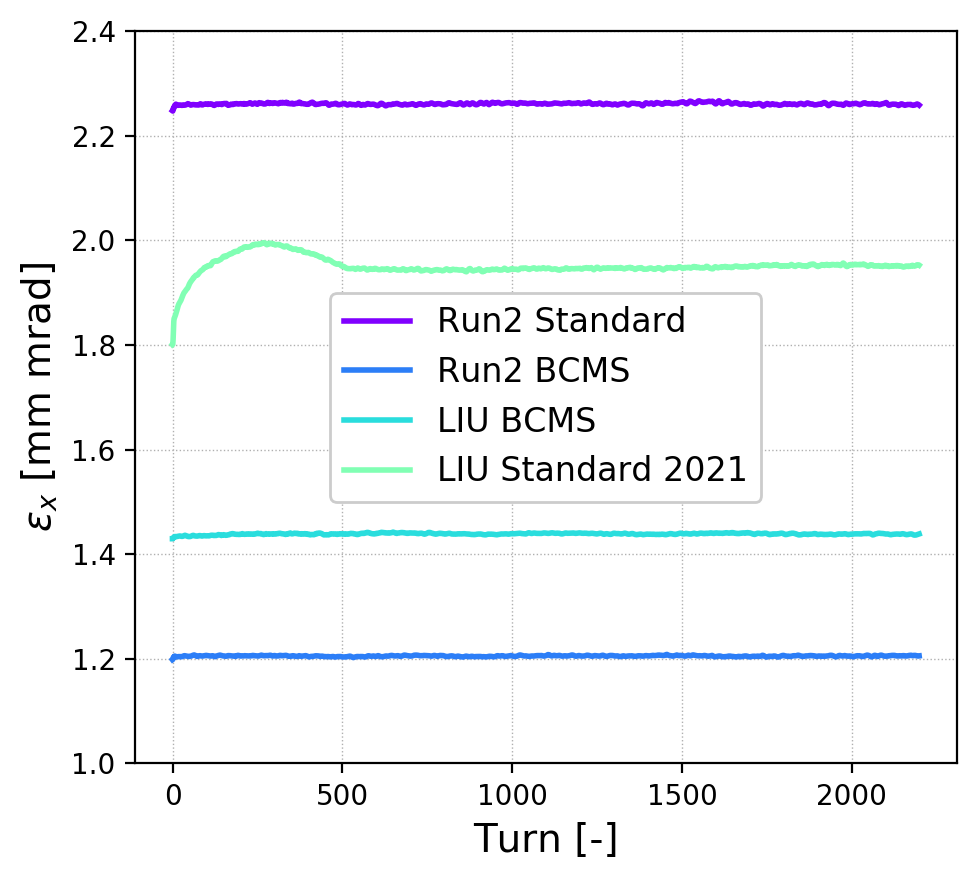

In [38]:
dd = dict()

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', '00 Run2 Standard')
dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', '01 Run2 BCMS')

dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', '02 LIU BCMS')

dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', '03 LIU Standard 2021')
#dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', '04 LIU Standard 2022')
#dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', '05 LIU Standard 2023')

parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
#ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)








parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)









parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_average_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\frac{ \epsilon_{x_{RMS}} + \epsilon_{y_{RMS}} }{2}$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], ((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)






parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'_legend.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  00 Run2 Standard
	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  01 Run2 BCMS
	Added output data from  Run3_BCMS/output/output.mat 	 dictionary key:  02 LIU BCMS
	Added output data from  Run3_Standard_2021/output/output.mat 	 dictionary key:  03 LIU Standard 2021
	Added output data from  Run3_Standard_2022/output/output.mat 	 dictionary key:  04 LIU Standard 2022
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %
02 LIU BCMS Average  epsn_x  =  1.439  range =  0.01261  =  0.8765 %
03 LIU Standard 2021 Average  epsn_x  =  1.952  range =  0.1946  =  9.971 %
04 LIU Standard 2022 Average  epsn_x  =  1.799  range =  0.0132  =  0.7337 %
00 Run2 Standard Average  epsn_y  =  2.253  range =  0.01011  =  0.4487 %
01 Run2 BCMS Average  epsn_y  =  1.205  range =  0.006086  =  0.5052 %
02 LIU BCMS Average  e

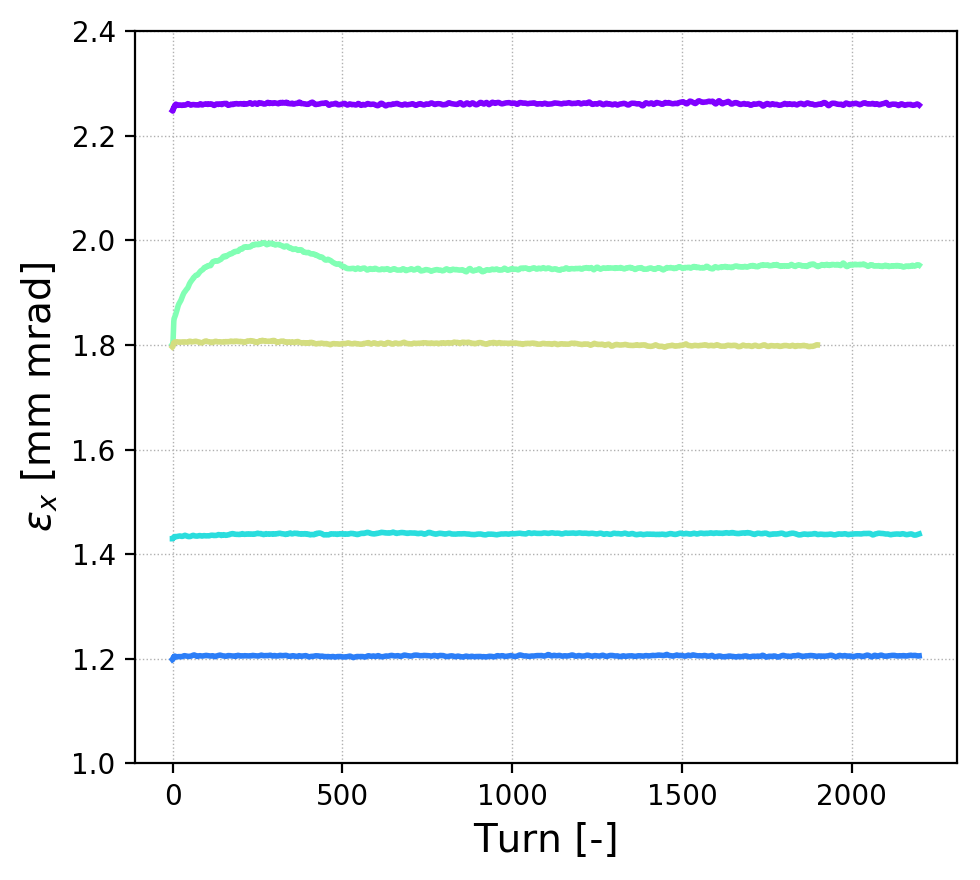

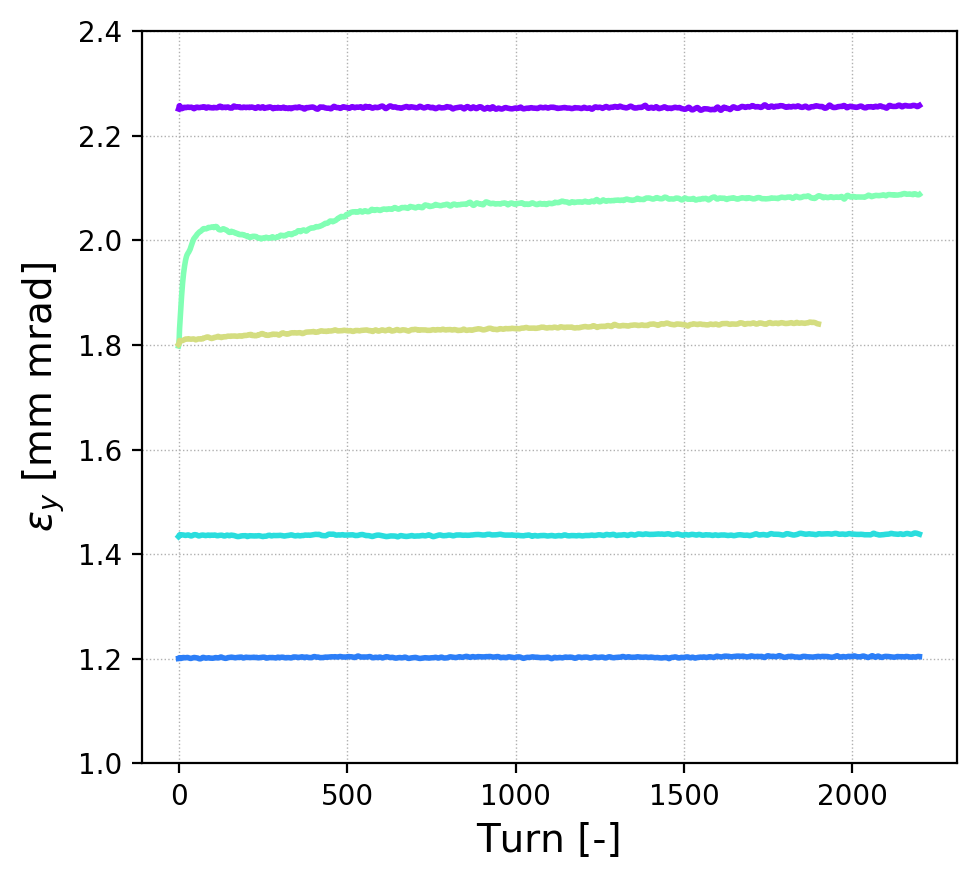

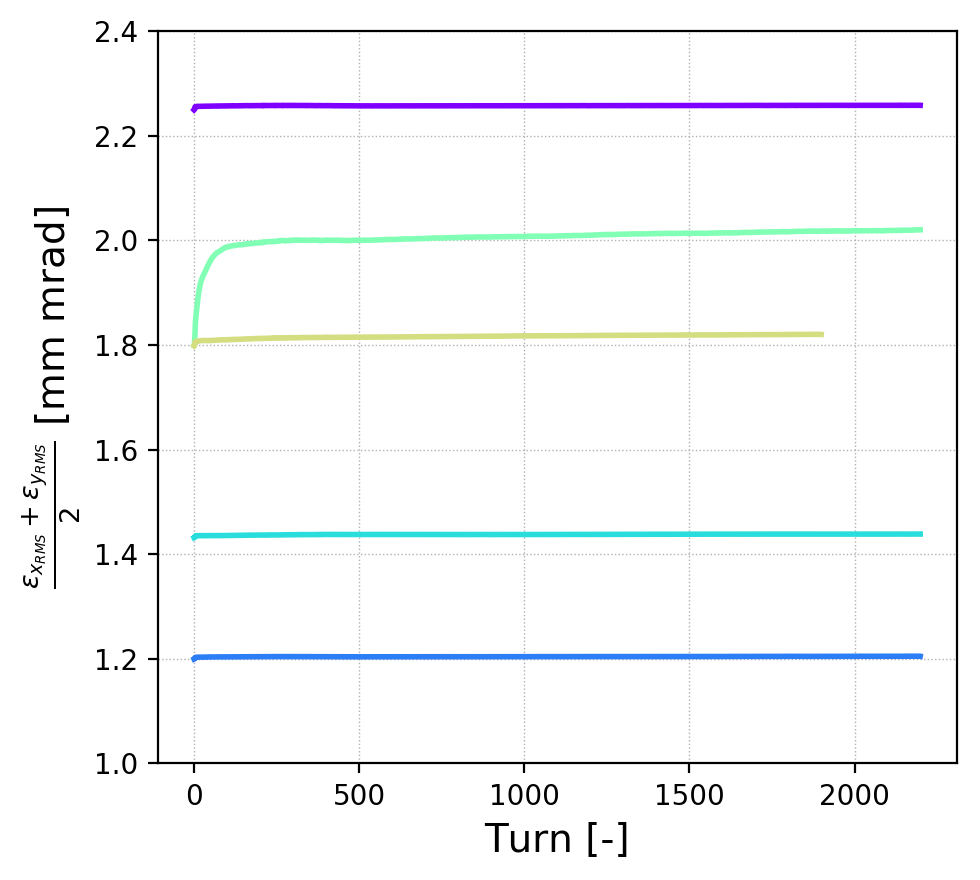

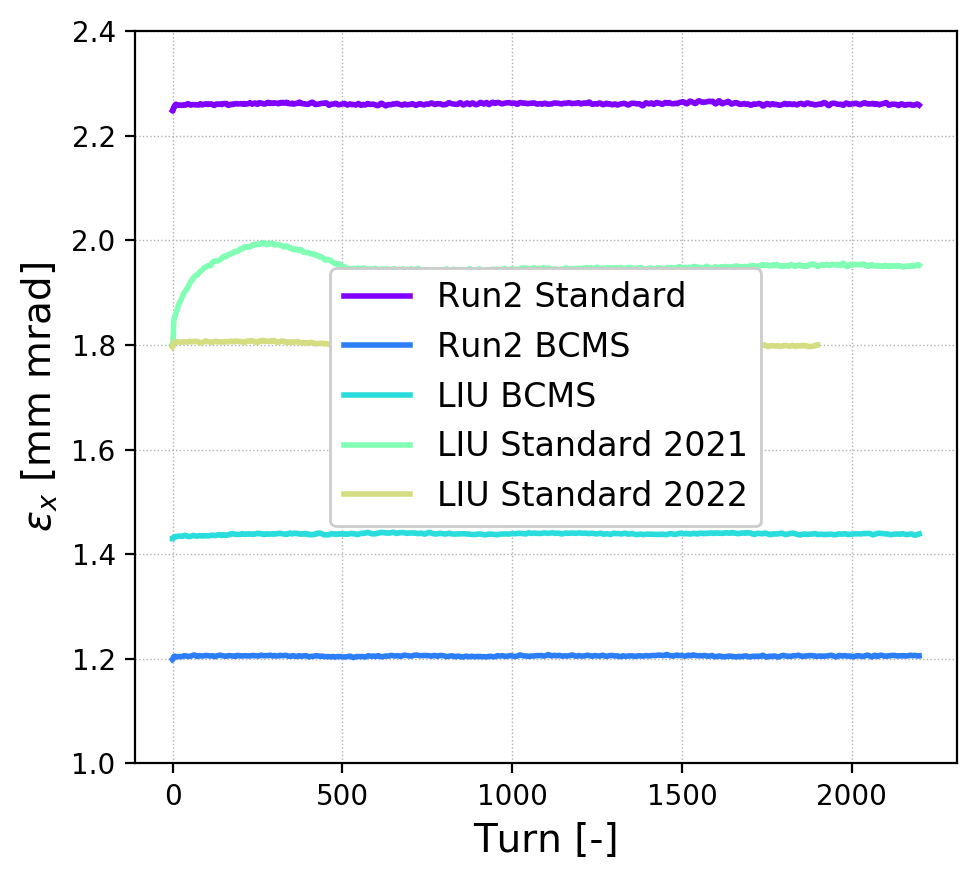

In [39]:
dd = dict()

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', '00 Run2 Standard')
dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', '01 Run2 BCMS')

dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', '02 LIU BCMS')

dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', '03 LIU Standard 2021')
dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', '04 LIU Standard 2022')
#dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', '05 LIU Standard 2023')

parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
#ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)








parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)









parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_average_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\frac{ \epsilon_{x_{RMS}} + \epsilon_{y_{RMS}} }{2}$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], ((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)






parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'_legend.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  00 Run2 Standard
	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  01 Run2 BCMS
	Added output data from  Run3_BCMS/output/output.mat 	 dictionary key:  02 LIU BCMS
	Added output data from  Run3_Standard_2021/output/output.mat 	 dictionary key:  03 LIU Standard 2021
	Added output data from  Run3_Standard_2022/output/output.mat 	 dictionary key:  04 LIU Standard 2022
	Added output data from  Run3_Standard_2023/output/output.mat 	 dictionary key:  05 LIU Standard 2023
00 Run2 Standard Average  epsn_x  =  2.263  range =  0.01965  =  0.8682 %
01 Run2 BCMS Average  epsn_x  =  1.205  range =  0.009952  =  0.8259 %
02 LIU BCMS Average  epsn_x  =  1.439  range =  0.01261  =  0.8765 %
03 LIU Standard 2021 Average  epsn_x  =  1.952  range =  0.1946  =  9.971 %
04 LIU Standard 2022 Average  epsn_x  =  1.799  range =  0.0132  =  0.7337 %
05 LIU Standard 2023 Average  epsn_x  =  1.813  range =  0.01324 

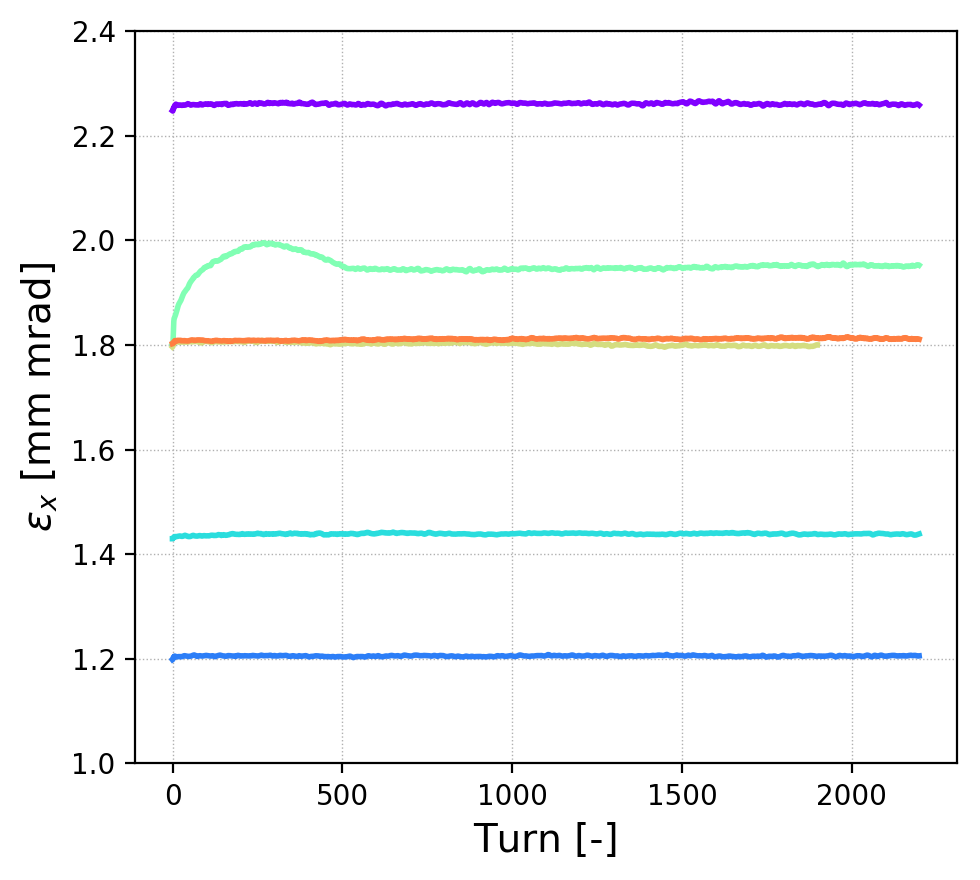

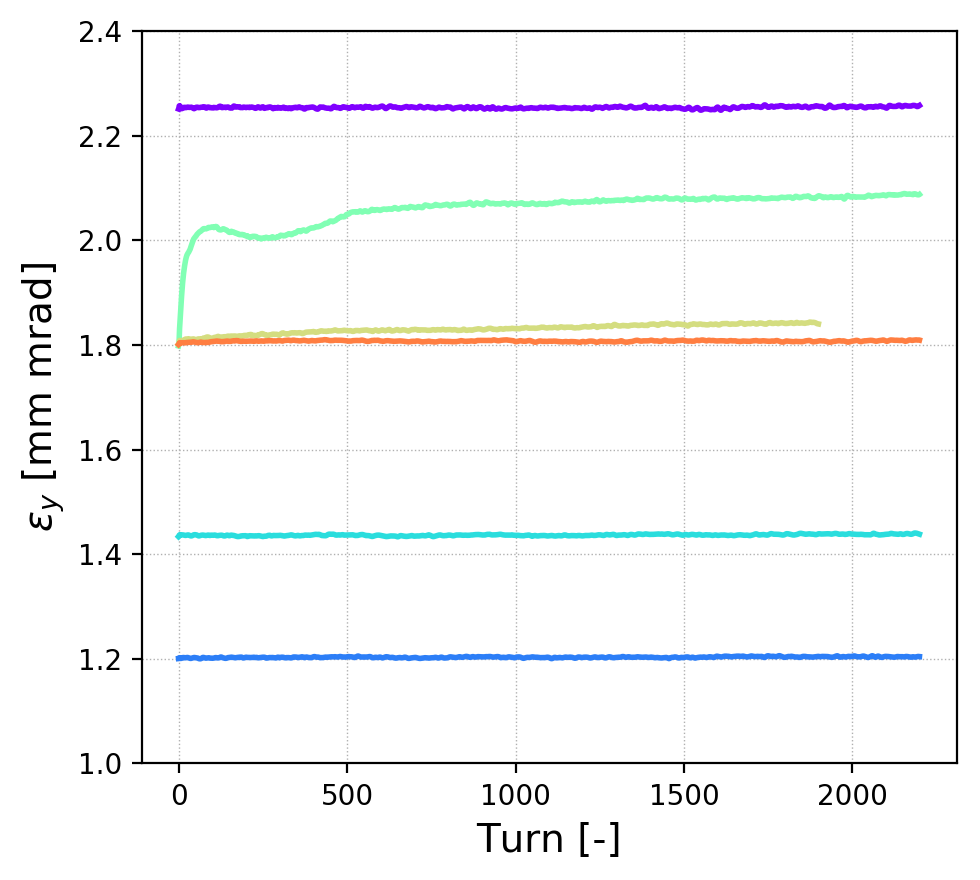

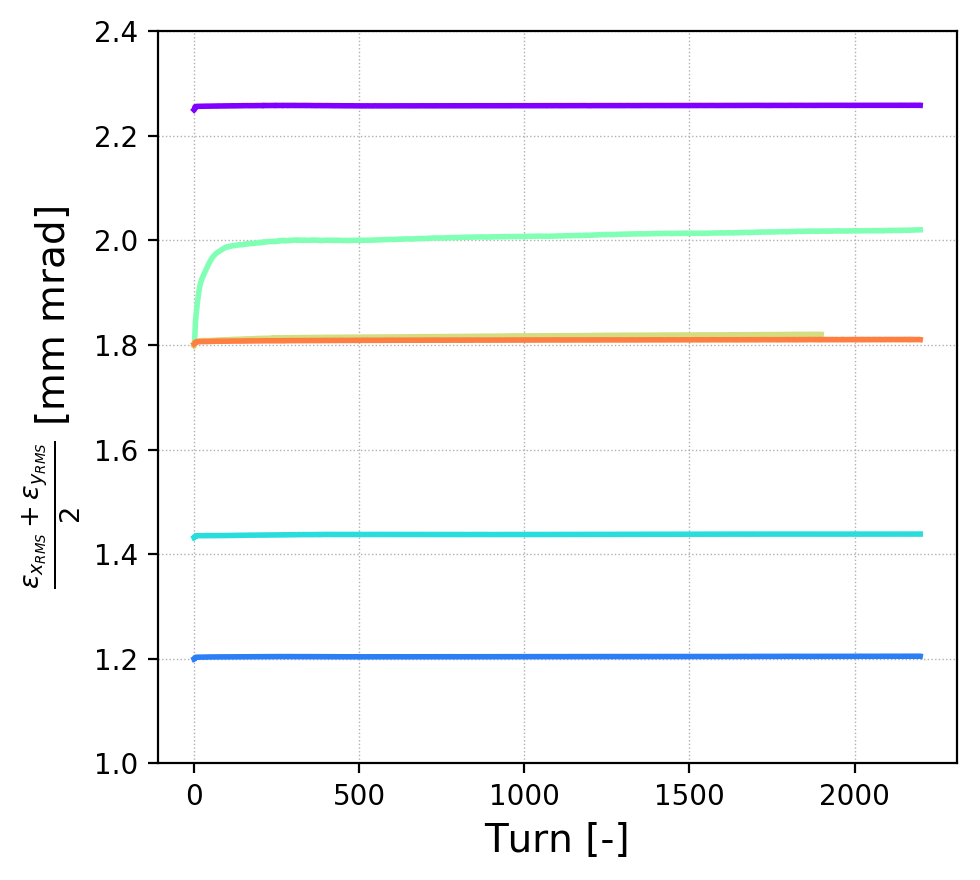

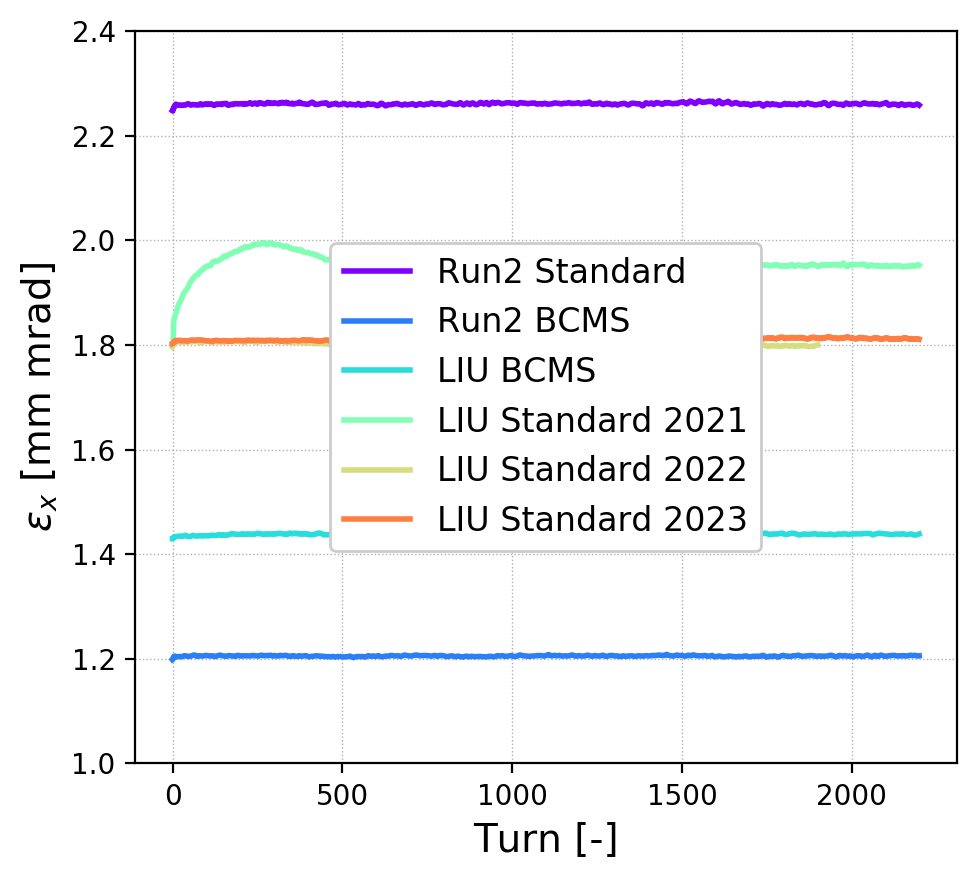

In [42]:
dd = dict()

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', '00 Run2 Standard')
dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', '01 Run2 BCMS')

dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', '02 LIU BCMS')

dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', '03 LIU Standard 2021')
dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', '04 LIU Standard 2022')
dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', '05 LIU Standard 2023')

parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
#ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)








parameter1 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    print key, 'Average ', parameter1, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)









parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_average_rampup_' + str(len(dd))+'.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\frac{ \epsilon_{x_{RMS}} + \epsilon_{y_{RMS}} }{2}$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_y'][0][-500:]) - dd[key]['epsn_y'][0][0])/(dd[key]['epsn_y'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    lab_ = key[3:] + r' $\frac{\Delta \epsilon_y}{\epsilon_{y_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'

    ax1.plot(dd[key]['turn'][0], ((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2, color=colors[c_it], label=lab_);
    
    av_ = np.mean(((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2)
    rang_ = np.abs(np.max(((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2) - np.min(((dd[key][parameter1][0]+dd[key][parameter2][0])*multi1)/2))
    
    print key, 'Average average epsn = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

#ax1.legend(loc=10, framealpha=0.0)
ax1.grid(which='both', ls=':', lw=0.5)

ax1.set_ylim(1.0, 2.4)
plt.tight_layout()
fig.savefig(savename)






parameter1 = 'epsn_x'
multi1 = 1E6

fig, ax1 = plt.subplots();
#ax1.set_title('PyORBIT Output: BLonD Input Test')

savename = save_folder +'/' + main_label + '_' +  parameter1 + '_rampup_' + str(len(dd))+'_legend.png'

ax1.set_xlabel('Turn [-]')
ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');


colors = cm.rainbow(np.linspace(0, 1, 7))
c_it = int(0)

for key in sorted(dd.iterkeys()):
    eps_ov_eps_0 = 100*(np.mean(dd[key]['epsn_x'][0][-500:]) - dd[key]['epsn_x'][0][0])/(dd[key]['epsn_x'][0][0])
    # eps_ov_eps_0 = 100*(np.max(dd1[key]['epsn_x'][0]) - np.min(dd1[key]['epsn_x'][0]))/(dd1[key]['epsn_x'][0][0])
    #lab_ = key[3:] + r' $\frac{\Delta \epsilon_x}{\epsilon_{x_0}} = $' +str(round_sig(eps_ov_eps_0,2))+'%'
    lab_ = key[3:]
    ax1.plot(dd[key]['turn'][0], dd[key][parameter1][0]*multi1, color=colors[c_it], label=lab_);
    
    #av_ = np.mean(dd[key][parameter1][0][-100]*multi1)
    #rang_ = np.abs(np.max(dd[key][parameter1][0]*multi1) - np.min(dd[key][parameter1][0]*multi1))
    
    #print key, 'Average ', parameter1, ' = ' , \
    #    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;

ax1.set_ylim(1.0, 2.4)
ax1.legend(loc=10, framealpha=1.0)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)